# Trabalho de ICD
Uma investigação da relação entre os diferentes problemas de Planeamento Urbano e a aplicação de técnicas de Ciência de Dados\
\
Heitor Leme - nº 105191\
Margarida Santos - nº 124236\
\
**Universidade de Aveiro**\
**Mestrado em Ciência de Dados para Ciências Sociais**\
2024.2

### Tabela de conteúdos

| **Seção**                                     | **Descrição**                                                                                   |
|-----------------------------------------------|-----------------------------------------------------------------------------------------------|
| **Introdução**                                | Apresentação do contexto, objetivos e relevância do estudo.                                    |
| **Metodologia**                               | Descrição do método geral utilizado para conduzir a análise.                                   |
| **Primeira etapa - Extração dos dados**       | Detalhamento do processo de obtenção e coleta dos dados necessários para a análise.           |
| **Segunda etapa - Análise Bibliométrica**     | Identificação de padrões bibliométricos, como autores, periódicos e citações relevantes.       |
| **Terceira etapa - Extração e processamento dos abstracts** | Processamento dos resumos para análise textual e extração de informações úteis.                |
| **Quarta etapa - Modelagem e clusterização dos tópicos via LDA** | Uso de LDA (Latent Dirichlet Allocation) para identificar e agrupar tópicos nos dados.          |
| **Quinta etapa - Modelagem e clusterização dos tópicos via Tf-idf** | Uso de TF-IDF para identificar e analisar tópicos relevantes por cluster nos dados.             |
| **Sexta etapa - Encontrar as técnicas de Ciência de Dados utilizadas em cada artigo** | Identificação e classificação das técnicas de ciência de dados citadas nos artigos analisados. |
| **Conclusões**                                | Síntese dos resultados encontrados e implicações do estudo.                                    |


### Introdução

Os rápidos desenvolvimentos nos campos da Ciência de Dados e - mais recentemente - da Inteligência Artificial têm afetado praticamente todas as áreas de atividades humanas. Da análise no desporto à neurociência, do marketing à arte, da geografia às comunicações... O progresso científico e tecnológico, somado à abundância de dados produzidos todos os dias, possibilitou a utilização de dados para a tomada de decisão numa escala sem precedentes. \
\
Assim, pareceu-nos interessante tentar identificar como a Ciência de Dados tem sido aplicada, dentro do ramo das Ciências Sociais, a temáticas relacionadas ao Planeamento Urbano. Enquanto estudantes de um curso de Mestrado em Ciência de Dados para Ciências Sociais, importa-nos responder a duas questões centrais:

* A quais problemas de Planeamento Urbano têm sido aplicadas as técnicas, ferramentas e recursos do campo da Ciência de Dados?; e
* Há técnicas mais importantes, ou adequadas, a determinados tipos de problemas?

### Metodologia

Para isso, recorremos a uma abordagem semi-automatizada para a revisão da literatura publicada, definindo o nosso espaço de interesse como os temas de Planeamento Urbano, Gestão Urbana, Planeamento Espacial ou Desenvolvimento Urbano, em conjunção com temáticas de Big Data ou Data Science, e restrito ao campo das Ciências Sociais. Coletamos - via API da Scopus - dados sobre aproximadamente 700 artigos publicados desde 2013. Sobre esses dados, realizamos uma série de análises.\
\
A primeira parte das nossas análises destinou-se à bibliometria. Com isso, pretendíamos caracterizar e visualizar algumas características do nosso conjunto de artigos - e, por que não?, deste campo do conhecimento. Análises particularmente interessantes estiveram relacionadas ao país de origem dos pesquisadores, aos anos de publicação e às universidades a que os autores estavam afiliados.\
\
A segunda parte das nossas análises voltou-se à caracterização do corpo de textos. Para isso automatizamos a coleta dos abstracts via API da Scopus e, a seguir, aplicamos técnicas de Processamento de Linguagem Natural para encontrar termos mais frequentes, termos mais característicos, etc.. Ao fim passamos à etapa de *modelagem*, buscando identificar padrões e associações que nos permitissem generalizar, com certo grau de confiabilidade, qualquer percepção no sentido de uma maior representatividade de um sub-tópico ou determinada técnica de ciência de dados. Para isso valemo-nos de técnicas como a LDA e a automatização de procedimentos de Named Entity Recognition via GPT-3.5-turbo.

### Primeira etapa - Extração dos dados

A extração de dados foi automatizada através da API fornecida pela Scopus.

In [114]:
# Realizar importações

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [ ]:
# Configuração da chave API para importar os dados dos artigos
MY_SCOPUS_API_KEY = #
api_link = "https://api.elsevier.com/content/search/scopus"
user_query = 'TITLE-ABS-KEY(( "Data science" OR "big data" ) AND ( "urban planning" OR "urban management" OR "spatial planning" OR "urban development")) + SUBJAREA(SOCI)'
start = 0

headers={'Accept':'application/json',
         'X-ELS-APIKey': MY_SCOPUS_API_KEY,
         'subj': 'SOCI',
         'cursor': '*',
         'start': str(start)}
params={'query' : user_query,
        'start' : "1"}

In [117]:
# Enviar request para API
response = requests.get(api_link, headers=headers, params=params)

# Verificar resultado JSON
results = response.json()
results

{'search-results': {'opensearch:totalResults': '765',
  'opensearch:startIndex': '1',
  'opensearch:itemsPerPage': '25',
  'opensearch:Query': {'@role': 'request',
   '@searchTerms': 'TITLE-ABS-KEY(( "Data science" OR "big data" ) AND ( "urban planning" OR "urban management" OR "spatial planning" OR "urban development")) + SUBJAREA(SOCI)',
   '@startPage': '1'},
  'link': [{'@_fa': 'true',
    '@ref': 'self',
    '@href': 'https://api.elsevier.com/content/search/scopus?start=1&count=25&query=TITLE-ABS-KEY%28%28+%22Data+science%22+OR+%22big+data%22+%29+AND+%28+%22urban+planning%22+OR+%22urban+management%22+OR+%22spatial+planning%22+OR+%22urban+development%22%29%29+%2B+SUBJAREA%28SOCI%29',
    '@type': 'application/json'},
   {'@_fa': 'true',
    '@ref': 'first',
    '@href': 'https://api.elsevier.com/content/search/scopus?start=0&count=25&query=TITLE-ABS-KEY%28%28+%22Data+science%22+OR+%22big+data%22+%29+AND+%28+%22urban+planning%22+OR+%22urban+management%22+OR+%22spatial+planning%22+OR

In [118]:
# Obter número de resultados
number_of_articles_retrieved = results["search-results"]["opensearch:totalResults"]
number_of_articles_retrieved

# Testar respostas
df_teste = pd.json_normalize(results["search-results"], ["entry"])
df_teste.head()
df_teste.shape

# Só está "puxando" a primeira página da pesquisa
# Atualizar código acima para "puxar" todos os resultados

(25, 30)

In [119]:
# Criar loop

max_retries = 100
total_results = None
df_novo = pd.DataFrame()
count = 25

while True:
  try:
    response = requests.get(api_link, headers=headers, params=params)
    response.raise_for_status()
    data = response.json()

    # Encontrar número total de resultados
    if total_results is None:
      total_results = int(data['search-results']['opensearch:totalResults'])

    # Coletar resultados da página
    current_page = pd.json_normalize(data['search-results'], ['entry'])
    if df_novo.empty:
      df_novo = current_page
    else:
      df_novo = pd.concat([df_novo, current_page], ignore_index=True)

    # Checar se já recolhemos todos os resultados
    start += count
    params['start'] = str(start)
    if start >= total_results:
      break

    # Delay para evitar desconexão
    time.sleep(0.2)

  except requests.exceptions.RequestException as e:
    print(f"Request error on attempt {attempt + 1}/{max_retries}: {e}")
    time.sleep(1)
    if attempt + 1 == max_retries:
      raise RuntimeError("Maximum retries reached") from e
    
# Verificar df_novo
df_novo.shape
df_novo.head()

,@_fa,link,prism:url,dc:identifier,eid,dc:title,dc:creator,prism:publicationName,prism:issn,prism:volume,...,article-number,source-id,openaccess,openaccessFlag,prism:eIssn,prism:issueIdentifier,prism:isbn,freetoread.value,freetoreadLabel.value,pubmed-id
0,true,"[{'@_fa': 'true', '@ref': 'self', '@href': 'ht...",https://api.elsevier.com/content/abstract/scop...,SCOPUS_ID:85212312854,2-s2.0-85212312854,The impact of data elements on urban sustainab...,Wu T.,Technology in Society,0160791X,81,...,102800,18676,0,False,NaN,NaN,NaN,NaN,NaN,NaN
1,true,"[{'@_fa': 'true', '@ref': 'self', '@href': 'ht...",https://api.elsevier.com/content/abstract/scop...,SCOPUS_ID:85213696301,2-s2.0-85213696301,Block-scale modeling of residential land price...,Zhang P.,Habitat International,01973975,156,...,103283,13760,0,False,NaN,NaN,NaN,NaN,NaN,NaN
2,true,"[{'@_fa': 'true', '@ref': 'self', '@href': 'ht...",https://api.elsevier.com/content/abstract/scop...,SCOPUS_ID:85212590825,2-s2.0-85212590825,Exploring temporal and spatial patterns and no...,Zhao X.,Sustainable Cities and Society,22106707,119,...,106083,19700194105,0,False,NaN,NaN,NaN,NaN,NaN,NaN
3,true,"[{'@_fa': 'true', '@ref': 'self', '@href': 'ht...",https://api.elsevier.com/content/abstract/scop...,SCOPUS_ID:85212589355,2-s2.0-85212589355,A vehicle trajectory-based parking location re...,Su Z.,Sustainable Cities and Society,22106707,119,...,106088,19700194105,0,False,NaN,NaN,NaN,NaN,NaN,NaN
4,true,"[{'@_fa': 'true', '@ref': 'self', '@href': 'ht...",https://api.elsevier.com/content/abstract/scop...,SCOPUS_ID:85211033234,2-s2.0-85211033234,Assessing urban-scale spatiotemporal heterogen...,Zhang G.,Journal of Transport Geography,09666923,123,...,104081,29295,0,False,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# Criar listas para armazenar as colunas
single_value_columns = []
list_columns = []

# Verificar colunas nested
for column in df_novo.columns:
    if isinstance(df_novo[column].iloc[0], list):
        list_columns.append(column)
    else:
        single_value_columns.append(column)

# Exibir as listas
print("Single Value Columns:")
print(single_value_columns)

print("\nList Columns:")
print(list_columns)

Single Value Columns:
['@_fa', 'prism:url', 'dc:identifier', 'eid', 'dc:title', 'dc:creator', 'prism:publicationName', 'prism:issn', 'prism:volume', 'prism:pageRange', 'prism:coverDate', 'prism:coverDisplayDate', 'prism:doi', 'pii', 'citedby-count', 'prism:aggregationType', 'subtype', 'subtypeDescription', 'article-number', 'source-id', 'openaccess', 'openaccessFlag', 'prism:eIssn', 'prism:issueIdentifier', 'prism:isbn', 'freetoread.value', 'freetoreadLabel.value', 'pubmed-id']

List Columns:
['link', 'affiliation']


In [120]:
# Obter informações sobre afiliação
df_affiliation = pd.json_normalize(results["search-results"],['entry', 'affiliation'] )
df_affiliation.columns
df_affiliation

# Filtrar DF
FIELDS = ['dc:title', "prism:doi", 'dc:creator', 'citedby-count', 'openaccess', 'prism:aggregationType']
df_novo[FIELDS][:3]

# Criar novo DF
df_all = pd.merge(df_novo[FIELDS], df_affiliation, how='left', left_index=True, right_index=True)
df_all[:3]

,dc:title,prism:doi,dc:creator,citedby-count,openaccess,prism:aggregationType,@_fa,affilname,affiliation-city,affiliation-country
0,The impact of data elements on urban sustainab...,10.1016/j.techsoc.2024.102800,Wu T.,0,0,Journal,true,Jiangxi University of Finance and Economics,Nanchang,China
1,Block-scale modeling of residential land price...,10.1016/j.habitatint.2024.103283,Zhang P.,0,0,Journal,true,Chang'an University,Xi'an,China
2,Exploring temporal and spatial patterns and no...,10.1016/j.scs.2024.106083,Zhao X.,0,0,Journal,true,Shaanxi Key Laboratory of Land Consolidation,Xi'an,China


In [121]:
# Remover duplicados
df_all = df_all.drop_duplicates(subset=['dc:title', 'dc:creator'])

if df_all.shape[0] == 743:
   print("Sem duplicados.")
else:
   print("Número de duplicados:", (df_all.shape[0]) - 743)

# Remover artigos que não estão em inglês
from langdetect import DetectorFactory, detect

DetectorFactory.seed = 0

def detect_language(title):
    try:
        return detect(title)
    except:
        return 'unknown'

df_all['language'] = df_all['dc:title'].apply(detect_language)

df_all = df_all[df_all['language'] == 'en']
if df_all.shape[0] == 743:
   print("Todos os artigos estão em inglês.")
else:
    print('Número de artigos noutras línguas:', 742 - df_all.shape[0])

Número de duplicados: 20
Número de artigos noutras línguas: -7


In [123]:
# Número final de artigos
print('Número final de artigos:', df_all.shape[0])

# Guardar o Dataframe num CSV
df_all.to_csv(r'df_ALL_resultados.csv', index=False)

Número final de artigos: 749


### Segunda etapa - Análise Bibliométrica

A análise bibliométrica foi realizada com base em **seis objetivos**:

1. Análise da ocorrência e coocorrência das palavras-chave;
2. Análise dos termos dos títulos;
3. Análise da evolução temporal da publicação dos artigos;
4. Análise do tipo de publicação;
5. Análise das afiliações;
6. Análise das citações.

**Nota:** Não foi realizada uma análise de domínios/área científica, porque os nossos critérios de pesquisa **limitaram os resultados ao domínio das Ciências Sociais**.

##### **1. Análise da ocorrência e coocorrência das palavras-chave**

Testámos pedir à API da SCOPUS as palavras-chaves dos autores, de forma a construirmos uma **rede bibliométrica de coocorrência de palavras-chave**, mas a API forneceu o seguinte status de resposta:


> *HTTP 401 - Unauthorized (APIKey [...] with IP address [...] is unrecognized or has insufficient privileges for access to this resource)*


Portanto, não tendo acesso a essa informação, analisámos as networks das keywords através do **VOSviewer** (versão 1.6.20).

Os **critérios** utilizados para a construção da rede foram:
- Type of analysis: **Co-ocorrence**
- Couting method: **Full counting**
- Unit of analysis: **Author keywords**
- Minimum number of occorrences of a keyword: **5**

Foi também criado um **ficheiro 'thesaurus'**, usado para juntar diferentes variantes do mesmo termo (eg. 'remote-sensing' == 'remote sensing', 'ai' == 'artificial intelligence').

O conteúdo do VOSviewer foi incorporado neste notebook utilizando a função IFrame da biblioteca IPython.display.

In [124]:
from IPython.display import IFrame

# URL do VOSviewer
url = "https://tinyurl.com/2dnj4oaf"

# Criar o IFrame
iframe_autKeywords = IFrame(src=url, width="100%", height="600px", style="border: 1px solid #ddd; max-width: 1000px; min-height: 500px")

# Exibir o IFrame
display(iframe_autKeywords)

**Interpretação da rede:**

A rede bibliométrica de co-ocorrência de palavras-chaves, criada com base nos parâmetros definidos anteriormente, resultou em 65 palavras-chave, 385 ligações e 6 clusters.

A palavra-chave com maior ocorrência é *'big data'* ($n = 218$), seguida de *'smart cities'* ($n = 98$) e *'urban planning'* ($n = 67$). Estas três criam os três maiores clusters (em termos de ocorrência das palavras-chave).

O termo 'big data' (pertencente ao cluster 1) surge fortemente associado ao cluster 2 associado a 'smart cities' (link strength = $51$) e ao cluster 4 associado a 'urban planning' (link strength = $25$). Este cluster engloba termos relacionados com a ciência de dados e big data, nomeadamente, *'machine learning'* e *'geospatial big data', e outros relacionados com estudos urbanos, como *'point of interest'*,  *'built environment'*, *'urban vitality'**.

O termo 'urban planning', sendo também um dos termos dos nossos critérios de pesquisa, surge aqui como a keyword central, ligada a todos os clusters.

É curioso observar a força do *cluster 2, associado às *'smart cities'*, que não sendo um dos termos de pesquisa, surge aqui como um dos temas centrais. Isto dá-nos uma ideia de que os estudos do planeamento urbano, com recurso à big data, focam-se bastante no tema das cidades inteligentes e sustentáveis. O termo *'internet of things'* surge também aqui como um cluster importante associado às *'smart cities'**.

A *'China'* surge como o termo mais importante do *cluster 5, associada a *'covid-19'* e a *'social media'*. Relacionado com a China, surgem outros termos como *'beijing'* e *'shanghai'**, o que indica que estudos sob a China, no geral, e algumas cidades chinesas, em particular, tem um peso relevante neste tema. Não surgem termos associados a mais nenhum território.

##### **2. Análise dos termos dos títulos**

A análise dos termos dos títulos dos artigos permite-nos identificar os tópicos mais estudados, e respetivos clusters.

Os **critérios** utilizados para a construção da rede bibliométrica dos termos dos títulos foram:
- Fields: **Title field**
- Couting method: **Full counting**
- Minimum number of occorrences of a keyword: **8**

**Visualização da rede bibliométrica dos termos dos títulos:**

In [125]:
# URL do VOSviewer
url = "https://tinyurl.com/2yfax6ft"

# Criar o IFrame
iframe_autKeywords = IFrame(src=url, width="100%", height="600px", style="border: 1px solid #ddd; max-width: 1000px; min-height: 500px")

# Exibir o IFrame
display(iframe_autKeywords)

##### **3. Análise da evolução temporal da publicação dos artigos**

A análise da evolução temporal da publicação dos artigos é útil pois permite **identificar tendências na produção científica**, revelando períodos de maior interesse ou atividade num campo de pesquisa específico, entre outros.

Antes de criar o gráfico para representar a informação, é necessário **extrair os anos de publicação de cada artigo**. Para isso, extraímos só os anos de 'prism:coverDate', que tem a data na estrutura AAAA-MM-DD (e.g. 2025-08-01), e criamos uma nova coluna com esses dados.

In [126]:
# Extrair apenas os anos da coluna 'prism:coverDate'
df_all["prism:coverDate"] = df_novo["prism:coverDate"]
df_all['year'] = pd.to_datetime(df_novo['prism:coverDate']).dt.year

# Exibir as primeiras linhas do DataFrame para verificar a nova coluna
print(df_all[['prism:coverDate', 'year']].head())

  prism:coverDate  year
0      2025-06-01  2025
1      2025-02-01  2025
2      2025-02-01  2025
3      2025-02-01  2025
4      2025-02-01  2025


In [127]:
# Visualização gráfica

import plotly.express as px

# Contar o número de artigos por ano
year_counts = df_all['year'].value_counts().sort_index()

# Definir a escala de cores personalizada
custom_colors = [
    "#003f5b", "#2b4b7d", "#5f5195", "#98509d",
    "#cc4c91", "#f25375", "#ff6f4e", "#ff9913"
]

# Criar o gráfico de barras interativo com plotly
fig = px.bar(
    x=year_counts.index,
    y=year_counts.values,
    labels={'x': 'Ano', 'y': 'Frequência'},
    title='Número de artigos por ano',
    color=year_counts.values,
    color_continuous_scale=custom_colors
)

# Ajustar a rotação dos rótulos do eixo x
fig.update_layout(xaxis_tickangle=-45)

# Exibir o gráfico
fig.show()

Podemos observar uma evolução significativa do volume de artigos publicados ao longo da última década. Dentre todos os artigos analisados, o mais antigo foi publicado em 2013; em 2014, o volume de artigos também foi baixíssimo. A partir de 2015, porém, o campo experimentou um crescimento notável - com incrementos anuais pré-pandemia, um ápice de publicações em 2021 seguido de uma queda em 2022, e voltou a crescer em 2023 e 2024.

O ano de 2021, um _outlier_ visual, pode ser explicado pelas grandes mudanças no cotidiano impostas pela pandemia da Covid-19. A importância do planeamento urbano, da análise das interações pessoais nas cidades e da análise dos dados espaciais, somada ao imenso volume de dados produzidos e disponibilizados publicamente sobre o tema, também influenciou positivamente a produção científica naquele período.

O crescimento anual no volume de publicações reflete, ainda, as mudanças estruturais promovidas pela tecnologia - em especial no tocante à obtenção, produção e análise de dados - e seus efeitos nos temas relativos ao planeamento urbano. Parece refletir, ainda, o potencial da Ciência de Dados para assumir protagonismo nos debates da área.

##### **4. Análise do tipo de publicação**

In [ ]:
# Contar o número de artigos por tipo de publicação
type_counts = df_all['prism:aggregationType'].value_counts()

import plotly.graph_objects as go

# Contar o número de artigos por tipo de publicação e ano
type_year_counts = df_all.groupby(['year', 'prism:aggregationType']).size().unstack(fill_value=0)

# Criar o gráfico de barras empilhadas interativo com plotly
fig_stacked_bar = go.Figure()

colors = ['#58508d', '#bc5090', '#ff6361', '#ffa600']

for i, col in enumerate(type_year_counts.columns):
    fig_stacked_bar.add_trace(go.Bar(
        x=type_year_counts.index,
        y=type_year_counts[col],
        name=col,
        marker_color=colors[i % len(colors)]
    ))
fig = px.bar(
    x=year_counts.index,
    y=year_counts.values,
    labels={'x': 'Ano', 'y': 'Frequência'},
    title='Número de artigos por ano',
    color=year_counts.values,
    color_continuous_scale=custom_colors
)

# Ajustar a rotação dos rótulos do eixo x e adicionar uma grade
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis=dict(
        showgrid=True,  # Mostrar grade no eixo x
        gridcolor='#fff7e7'  # Cor da grade no eixo x
    ),
    yaxis=dict(
        showgrid=True,  # Mostrar grade no eixo y
        gridcolor='#fff7e7'  # Cor da grade no eixo y
    ),
    barmode='stack',
    title='Número de artigos por tipo de publicação e por ano',
    xaxis_title='Ano',
    yaxis_title='Nº de artigos',
    plot_bgcolor='white',  # Definir o fundo do gráfico como branco
    paper_bgcolor='white'  # Definir o fundo do papel como branco
)

# Exibir o gráfico
fig.show()

Para todos os anos, a imensa maioria dos artigos analisados foi publicada em *Journals*. A seguir, e em segundo lugar, *Conference Proceedings* parecem ser outra forma relevante de publicação do conhecimento na área, ainda que significativamente menos frequentes que os artigos publicados em *Journals*.

A publicação em *Books* e *Books Series*, ainda menos frequente, não parece seguir grandes padrões. Em alguns anos (2017, por exemplo), muitos mais artigos foram publicados em *Books Series*; em outros (2023), as publicações em *Books* chegaram até mesmo a superar os *Conference Proceedings*.

Dentre os veículos de publicação, destacam-se o *Sustainability (Switzerland)* (com 63 publicações), *Cities* (52 publicações), *ISPRS International Journal of Geo-Information* (41 publicações), *Sustainable Cities and Society* (32 publicações), e *Computers, Environment and Urban Systems* (23 publicações). Isso dá-nos a ideia de que o tema da Ciência de Dados aplicada ao planeamento urbano tem assumido grande importância nas questões relativas à Sustentabilidade e ao Ambiente - e, portanto, na otimização dos recursos -, e aos Sistemas Urbanos.

##### **5. Análise de afiliações**

Para a análise das afiliações, optámos por analisar tendo em conta os três aspetos:
- Autores
- Organizações
- Países

Foram realizados mapas de redes no *VOSviewer* e também alguns gráficos complementares em *Python*.

Para a construção da rede de afiliação dos autores, utilizamos os seguintes critérios no VOSviewer:
- Type of analysis: **Co-authorship**
- Couting method: **Full counting**
- Unit of analysis: **Authors**
- Minimum number of documents of an author: **3**
- Reduce firt names of authors to inicials: ***False***
- Include all items, even if they are not connected: ***True***

**Visualização da rede de afiliação dos autores:**

In [129]:
# URL do VOSviewer
url = "https://tinyurl.com/2cu6okd3"

# Criar o IFrame
iframe_autKeywords = IFrame(src=url, width="100%", height="600px", style="border: 1px solid #ddd; max-width: 1000px; min-height: 500px")

# Exibir o IFrame
display(iframe_autKeywords)

A análise das redes de autores e citações permite-nos identificar vários clusters não-relacionados entre si, nas periferias do gráfico. Cada um destes clusters contém um ou dois autores que trabalham em conjunto e/ou abordam temas semelhantes, mas é só. No centro, com maior volume (representado pelo tamanho de cada círculo) e maior número de ligações, estão alguns autores chineses, com fortes colaborações entre si. A exceção parece ser Filip Biljecki, um autor não-chinês que colaborou com alguns pesquisadores daquele país.

Também é interessante verificar diferenças nos padrões temporais: dentre os autores com anos de publicação mais antigos, a imensa maior parte parece ser chinesa; em um recorte temporal mais recente (2023), porém, a proporção de autores ocidentais parece crescer.

Isso dá-nos, também, outra hipótese para a grande presença de autores de origem chinesa no campo: a aplicação de técnicas de Big Data e Data Science aos problemas de planeamento urbano parece ter sido uma abordagem iniciada por cientistas daquele país. Nesse sentido, e pelos efeitos de rede, é natural que o campo seja mais prolífico por lá.

In [131]:
df_all.columns

# Supondo que df_all já está definido e contém as colunas 'dc:creator', 'affiliation-country', 'affiliation-city', 'affilname'
# Verificar se as colunas necessárias estão presentes no DataFrame
required_columns = ['dc:creator', 'affiliation-country', 'affiliation-city', 'affilname']
if not all(column in df_all.columns for column in required_columns):
    raise ValueError(f"O DataFrame deve conter as colunas: {required_columns}")

# Extrair o autor principal (primeiro autor) de cada artigo
df_all['main_author'] = df_all['dc:creator'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

# Propagar as informações de afiliação, cidade e país para todos os autores
df_all['affilname'] = df_all.groupby('main_author')['affilname'].transform(lambda x: x.ffill().bfill())
df_all['affiliation-city'] = df_all.groupby('main_author')['affiliation-city'].transform(lambda x: x.ffill().bfill())
df_all['affiliation-country'] = df_all.groupby('main_author')['affiliation-country'].transform(lambda x: x.ffill().bfill())

# Filtrar os autores que têm afiliação
df_all_filtered = df_all.dropna(subset=['affilname', 'affiliation-city', 'affiliation-country'])

# Contar o número de artigos por autor principal
author_counts = df_all_filtered['main_author'].value_counts().reset_index()
author_counts.columns = ['author', 'n_artigos_pub']

# Criar um DataFrame com as colunas necessárias
author_info = df_all_filtered[['main_author', 'affilname', 'affiliation-city', 'affiliation-country']].drop_duplicates(subset=['main_author'])

# Mesclar os DataFrames para obter o DataFrame final
df_authors = pd.merge(author_counts, author_info, left_on='author', right_on='main_author', how='left')

# Selecionar e renomear as colunas
df_authors = df_authors[['author', 'n_artigos_pub', 'affilname', 'affiliation-city', 'affiliation-country']]
df_authors.columns = ['author', 'n_artigos_pub', 'affiliation', 'city', 'country']

# Ordenar o DataFrame pelo número de artigos publicados
df_authors = df_authors.sort_values(by='n_artigos_pub', ascending=False).reset_index(drop=True)

# Exibir o DataFrame
print(df_authors.head(10))

C:\Users\toto9\AppData\Local\Temp\ipykernel_7760\113740769.py:13: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\toto9\AppData\Local\Temp\ipykernel_7760\113740769.py:14: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\toto9\AppData\Local\Temp\ipykernel_7760\113740769.py:15: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



           author  n_artigos_pub  \
0         Yang Y.              5   
1        Zhang W.              3   
2          Gao F.              3   
3           Li Y.              2   
4         Zhao X.              2   
5           Li Z.              2   
6         Duan J.              2   
7          Zhu Y.              2   
8  Yigitcanlar T.              2   
9        Zhang P.              2   

                                         affiliation            city  \
0                            University College Cork            Cork   
1    Claremont Institute for Economic Policy Studies       Claremont   
2                Queensland University of Technology        Brisbane   
3  MaREI, the SFI Research Centre for Energy, Cli...            Cork   
4       Shaanxi Key Laboratory of Land Consolidation           Xi'an   
5                          Univerzita Hradec Králové  Hradec Kralove   
6                          Sichuan Normal University         Chengdu   
7             Instituto de 

A visualização dos autores com maior número de publicações parece apontar na mesma direção de outras análises realizadas anteriormente. Dentre os 10 autores mais prolíficos, 5 são afiliados a universidades chinesas. Para além destes, as universidades do Reino Unido apresentam 2 autores, enquanto Japão, EUA e Espanha apresentam um autor em cada. No top 10 não há, em nenhum país, dois autores ligados à mesma universidade.

É interessante notar que, mesmo para as universidades fora da China, a imensa maioria dos autores apresenta apelidos de origem chinesa. A exceção é Tan Yigitcanlar, autor australiano de origens turcas, ligado à University College London.

**Afliliação de organizações**

In [132]:
import pandas as pd
import plotly.graph_objects as go
import plotly.colors as pc

# Supondo que df_affiliation já está definido e contém as colunas 'affiliation-country', 'affiliation-city', 'affilname'
# Verificar se as colunas necessárias estão presentes no DataFrame
required_columns = ['affiliation-country', 'affiliation-city', 'affilname']
if not all(column in df_affiliation.columns for column in required_columns):
    raise ValueError(f"O DataFrame deve conter as colunas: {required_columns}")

# Criar uma coluna com as siglas das instituições
df_affiliation['institution_labels_simp'] = df_affiliation['affilname'].apply(lambda x: ''.join([word[0].upper() for word in x.split()]))

# Preparar os dados para o diagrama de Sankey
top_institutions = df_affiliation['affilname'].dropna().value_counts().nlargest(15).index.tolist()
filtered_df = df_affiliation[df_affiliation['affilname'].isin(top_institutions)]

countries = filtered_df['affiliation-country'].dropna().unique().tolist()
cities = filtered_df['affiliation-city'].dropna().unique().tolist()
institutions = filtered_df['affilname'].dropna().unique().tolist()
institution_labels_simp = [df_affiliation[df_affiliation['affilname'] == inst]['institution_labels_simp'].values[0] for inst in top_institutions]

# Criar labels para países, cidades e top 15 instituições
labels = countries + cities + institution_labels_simp

# Criar dicionários para mapear os índices
country_indices = {country: i for i, country in enumerate(countries)}
city_indices = {city: i + len(countries) for i, city in enumerate(cities)}
institution_indices = {institution: i + len(countries) + len(cities) for i, institution in enumerate(institution_labels_simp)}

# Criar listas para as fontes e destinos
sources = []
targets = []
values = []
link_colors = []


# Definir cores para os países
custom_colors = [
    "#5f5195", "#98509d",
    "#cc4c91", "#f25375",
    "#ff6f4e", "#ff9913"
]
country_colors = custom_colors[:len(countries)]

# Adicionar relações país -> cidade
city_article_counts = filtered_df.groupby('affiliation-city').size().to_dict()
for _, row in filtered_df.iterrows():
    if row['affiliation-country'] in country_indices and row['affiliation-city'] in city_indices:
        sources.append(country_indices[row['affiliation-country']])
        targets.append(city_indices[row['affiliation-city']])
        values.append(1)
        link_colors.append(country_colors[country_indices[row['affiliation-country']]])

# Adicionar relações cidade -> instituição
institution_article_counts = filtered_df.groupby('affilname').size().to_dict()
for _, row in filtered_df.iterrows():
    if row['affiliation-city'] in city_indices and row['institution_labels_simp'] in institution_indices:
        sources.append(city_indices[row['affiliation-city']])
        targets.append(institution_indices[row['institution_labels_simp']])
        values.append(1)
        # Criar uma cor mais clara para a instituição
        base_color = pc.hex_to_rgb(country_colors[country_indices[row['affiliation-country']]])
        lighter_color = pc.find_intermediate_color(base_color, (255, 255, 255), 0.5)
        lighter_color = f"rgb{lighter_color}"
        link_colors.append(lighter_color)

# Criar customdata para incluir o nome completo da instituição e o número de artigos
customdata = []
for label in labels:
    if label in countries:
        customdata.append(f"{label}")
    elif label in cities:
        count = city_article_counts.get(label, 0)
        customdata.append(f"{label}<br>Number of articles: {count}")
    else:
        institution = top_institutions[institution_labels_simp.index(label)]
        count = institution_article_counts.get(institution, 0)
        customdata.append(f"{institution}<br>Number of articles: {count}")

# Criar o diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        customdata=customdata,  # Texto completo para o pop-up
        hovertemplate='%{customdata}<extra></extra>',
        color="black",
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
)])
fig.update_layout(
    hovermode='x',
    title="TOP 10 Authors (associated organizations and countries)",
    font=dict(size=12, color='Black', family="Arial"),  # Tipo de letra mais simples e legível
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=700,
    height=700  # Aumentar a largura do gráfico
)

fig.show()

A análise das instituições com maior volume de publicações na área apresenta ligeiras diferenças relativamente ao Top-10 autores. No tocante às instituições, a China segue sendo a líder em representatividade - apresentando, ainda, a mais prolífica de todas (Hefei University of Technology).

Comparativamente aos autores mais prolíficos, temos uma menor presença britânica (com apenas uma universidade, a The University of Manchester), a saída da Espanha e a entrada de Singapura e da Turquia, com a Singapore City e a Tuzla, respectivamente.

Dentre as 10 instituições mais prolíficas, 8 são universidades e 2 são institutos.

##### **6. Análise das citações**

In [133]:
# URL do VOSviewer
url = "https://tinyurl.com/2dnzrwo3"

# Criar o IFrame
iframe_autKeywords = IFrame(src=url, width="100%", height="600px", style="border: 1px solid #ddd; max-width: 1000px; min-height: 500px")

# Exibir o IFrame
display(iframe_autKeywords)

A análise das citações por país confirma, novamente, a importância relativa da China em relação a outros países. Apresentando a maior frequência absoluta, seguida pelos Estados Unidos e o Reino Unido, a China aparece também ligada a publicações feitas em todas as áreas do mundo: dos EUA ao Reino Unido, da Turquia a Taiwan.

In [134]:
# URL do VOSviewer
url = "https://tinyurl.com/22m6be5g"

# Criar o IFrame
iframe_autKeywords = IFrame(src=url, width="100%", height="600px", style="border: 1px solid #ddd; max-width: 1000px; min-height: 500px")

# Exibir o IFrame
display(iframe_autKeywords)

A análise das redes de citações por artigo também nos permite identificar alguns padrões interessantes.

Em primeiro lugar, há uma clusterização ao redor de 4 clusters, relativamente afastados dos outros. Para cada cluster podemos identificar os papers mais citados e, portanto, alguns dos mais importantes em cada campo. Podemos observar que cada cluster de citações parece conter assuntos relativamente diferentes dos demais: à esquerda, temáticas de população e planeamento do tráfego; em cima, temáticas relacionadas à aplicação de Big Data a políticas socioeconômicas; em baixo, a associação de big data e smart cities; à direita, e de forma mais volumosa, temas relativos a IoT e smart cities.

In [135]:
try:
    print("A carregar o ficheiro original de forma a garantir que as análises permaneçam válidas...")
    time.sleep(1)
    df_all = pd.read_csv(r"C:\Users\toto9\Downloads\df_ALL_resultados.csv")
    time.sleep(0.5)
    print("Carregamento executado com sucesso!")
except:
    print("Não foi possível carregar o ficheiro original. O script deverá rodar, mas as análises aqui feitas não necessariamente permanecerão válidas")

A carregar o ficheiro original de forma a garantir que as análises permaneçam válidas...
Carregamento executado com sucesso!


### Terceira etapa - Extração e processamento dos abstracts

Após realizarmos a análise bibliométrica com base nos dados extraídos da base da Scopus procedemos à extração dos abstracts dos artigos encontrados com o objetivo de possibilitar, através da aplicação de técnicas de Natural Language Processing, a análise e interpretação dos resultados relativos ao corpus de textos.

In [136]:
# Criar lista com os identificadores (DOI) dos artigos
doi_list = df_all["prism:doi"]

In [ ]:
# Configurar API da Scopus para extração dos abstracts
MY_SCOPUS_API_KEY = #
url = "https://api.elsevier.com/content/abstract/doi/"

headers = {
        "X-ELS-APIKey": MY_SCOPUS_API_KEY,
        "Accept": "application/json"
    }

successful_abstracts = []
failed_dois = []

for doi in doi_list:
    url_final = url + str(doi)
    response = requests.get(url=url_final, headers=headers)
    if response.status_code == 200:
        try:
            data = response.json()
            abstract = data["abstracts-retrieval-response"]["coredata"]["dc:description"]
            successful_abstracts.append({
                "doi": doi,
                "abstract": abstract
            })
        except (KeyError, TypeError):
            # Caso a estrutura esperada não exista
            successful_abstracts.append({
                "doi": doi,
                "abstract": ""
            })
    else:
        successful_abstracts.append({
            "doi": doi,
            "abstract": ""
        })

In [138]:
# Adicionar coluna com abstracts ao Dataframe original
df_abstracts = pd.json_normalize(successful_abstracts)
df_all["abstract"] = df_abstracts.loc[:,"abstract"]

print(df_all)

                                              dc:title  \
0    The impact of data elements on urban sustainab...   
1    Block-scale modeling of residential land price...   
2    Exploring temporal and spatial patterns and no...   
3    A vehicle trajectory-based parking location re...   
4    Assessing urban-scale spatiotemporal heterogen...   
..                                                 ...   
744  Validation of spatial decay law caused by urba...   
745  Detecting the dynamics of urban structure thro...   
746  A new dimension in urban planning: The big dat...   
747  The use of social media for urban planning: Vi...   
748           Big data, smart cities and city planning   

                            prism:doi   dc:creator  citedby-count  openaccess  \
0       10.1016/j.techsoc.2024.102800        Wu T.              0           0   
1    10.1016/j.habitatint.2024.103283     Zhang P.              0           0   
2           10.1016/j.scs.2024.106083      Zhao X.          

In [140]:
# Limpar colunas desnecessárias do DF
df_all.drop(columns=["@_fa", "openaccess", "language"], axis=1, inplace=True)

In [142]:
# Preparar abstracts para NLP

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download("wordnet")

from nltk.stem import WordNetLemmatizer

from nltk import pos_tag

def clean_text(text_string, punctuations=r'''!()-[]{};:'\"\,<>./?@#$%^&*_~'''):
    # Verifica se text_string é uma lista e converte para string
    if isinstance(text_string, list):
        text_string = ' '.join(text_string)
    elif not isinstance(text_string, str):
        # Caso o valor não seja string nem lista, retorna vazio
        return []

    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', text_string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    string = re.sub(r'[^\w\s]', '', string)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    filtered_words = [word for word in string.split() if word not in stopwords.words('english')]

    # Custom stop words list
    customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                  "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                  "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "research", "study", "article", "data", "analysis", 
                  "results", "methods", "findings", "model", "approach", 
                  "information", "development", "evidence", "experiment", "impact", 
                  "performance", "evaluation", "process", "framework", "understanding", 
                  "application", "assessment", "theory", "knowledge", "design", "urban", "planning", "spatial", "big", "paper", "however",
                  "using", "based", "used", "also", "china"]

    # Applying custom stop words
    final_words = list(set(filtered_words) - set(customlist))

    # Tokenization
    tokens = word_tokenize(' '.join(final_words))

    # Remove numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Return final words
    final_words = " ".join(tokens)

    # Lemmatization
    #lemmatizer = WordNetLemmatizer()
    #lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    #stemmer = PorterStemmer()
    #stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\toto9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\toto9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\toto9\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [143]:
# Comparar colunas pré e pós-processamento
df_all["processedAbstract"] = df_all["abstract"].apply(clean_text)
df_all[["abstract", "processedAbstract"]]

,abstract,processedAbstract
0,This study addresses the research gap in exami...,"[elements, crucial, pulls, underlying, impleme..."
1,Accurate urban residential land price modeling...,"[essential, images, prices, central, artificia..."
2,"To fully realize the benefits of parks, they m...","[alternative, central, bus, timeconsuming, pop..."
3,Vehicle mobility impacts urban infrastructure ...,"[conventional, eg, positioning, lots, extracts..."
4,Assessing the coverage of metro stations is cr...,"[alternative, propose, attraction, lowcost, co..."
...,...,...
744,Urban multi-center phenomenon is very common i...,"[attraction, reveals, layout, centers, shenzhe..."
745,Urban spatial structure in large cities is bec...,"[b, essential, subdivision, graph, complex, la..."
746,,[]
747,User data created in the digital context has i...,"[dedicated, nature, focus, employment, systems..."


Aqui podemos notar que a coluna com os abstracts processados contém, essencialmente, uma versão menos "sofisticada" do que é comunicado na coluna original. Um pré-processamento bem-feito de linguagem natural para análise via NLP deve excluir palavras irrelevantes e demasiado comuns (as stopwords), remover sinais de pontuação e, em determinados casos, associar todas as variantes da mesma palavra à sua raiz ou forma canônica, assim facilitando o processamento; no entanto, o pré-processamento dos textos deve evitar, ao máximo, a perda do sentido original daquilo que era expresso.

### Quarta etapa - Modelagem e clusterização dos tópicos via LDA

Após pré-processar os *abstracts*, pudemos passar à fase seguinte - a modelagem. Nesta fase, em primeiro momento o nosso objetivo foi analisar o corpus de textos e identificar os temas mais centrais aos artigos publicados na área - visualizando, por exemplo, os termos mais comuns encontrados nos *abstracts*. A seguir, buscamos *clusterizar* os artigos com base nas informações de cada *abstract*, agrupando os artigos de forma a maximizar a semelhança entre os artigos do mesmo grupo ao mesmo tempo em que se maximiza as diferenças entre os artigos de grupos diferentes. Desta forma, objetivamos adicionar alguma profundidade a informações que, a princípio, pareciam semelhantes.

Para isso, buscamos identificar - através de um processo de vetorização e a utilização de um modelo LDA - tópicos e dimensões latentes nos textos que fossem comuns a mais de um abstract. O modelo LDA atinge esse propósito ao comparar, em todo o corpo de textos, a distribuição de determinados termos e a frequência com que alguns deles aparecem em conjunto. Esse modelo permite-nos perceber, por exemplo, quais são os temas mais importantes dentro de um determinado tópico.

In [144]:
try:
    print("A carregar o ficheiro original de forma a garantir que as análises permaneçam válidas...")
    time.sleep(1)
    df_all = pd.read_csv(r"C:\Users\toto9\OneDrive\Área de Trabalho\ICD\Trabalho ICD\df_processado.csv")
    time.sleep(0.5)
    print("Carregamento executado com sucesso!")
except:
    print("Não foi possível carregar o ficheiro original. O script deverá rodar, mas as análises aqui feitas não necessariamente permanecerão válidas")

A carregar o ficheiro original de forma a garantir que as análises permaneçam válidas...
Carregamento executado com sucesso!


In [156]:
# Preparar abstracts para NLP

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download("wordnet")

from nltk.stem import WordNetLemmatizer

from nltk import pos_tag

def clean_text(text_string, punctuations=r'''!()-[]{};:'\"\,<>./?@#$%^&*_~'''):
    # Verifica se text_string é uma lista e converte para string
    if isinstance(text_string, list):
        text_string = ' '.join(text_string)
    elif not isinstance(text_string, str):
        # Caso o valor não seja string nem lista, retorna vazio
        return []

    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', text_string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    string = re.sub(r'[^\w\s]', '', string)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    filtered_words = [word for word in string.split() if word not in stopwords.words('english')]

    # Custom stop words list
    customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                  "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                  "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "research", "study", "article", "data", "analysis", 
                  "results", "methods", "findings", "model", "approach", 
                  "information", "development", "evidence", "experiment", "impact", 
                  "performance", "evaluation", "process", "framework", "understanding", 
                  "application", "assessment", "theory", "knowledge", "design", "urban", "planning", "spatial", "big", "paper", "however",
                  "using", "based", "used", "also", "china"]

    # Applying custom stop words
    final_words = list(set(filtered_words) - set(customlist))

    # Tokenization
    tokens = word_tokenize(' '.join(final_words))

    # Remove numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Return final words
    final_words = " ".join(tokens)

    # Lemmatization
    #lemmatizer = WordNetLemmatizer()
    #lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    #stemmer = PorterStemmer()
    #stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\toto9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\toto9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\toto9\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [157]:
df_all["processedAbstract"] = df_all["abstract"].apply(clean_text)
df_all.head()

,Unnamed: 0,dc:title,dc:creator,prism:publicationName,prism:doi,citedby-count,affilname,affiliation-city,affiliation-country,abstract,processedAbstract,processedAbstract_str
0,0,From Vision to Reality: The Use of Artificial ...,Othengrafen F.,Urban Planning,10.17645/up.8576,0,Technische Universität Dortmund,Dortmund,Germany,"In an urban context, the use of artificial int...","[eg, solution, literature, intervene, artifici...",
1,1,Revitalizing urban industrial heritage: Enhanc...,Yue H.,Cities,10.1016/j.cities.2024.105538,0,Sichuan Normal University,Chengdu,China,This study shows how smart city development re...,"[errors, connections, faced, artificial, compl...",
2,2,Measuring the value of window views using real...,Peng C.,Cities,10.1016/j.cities.2024.105536,0,Huazhong Agricultural University,Wuhan,China,Window views significantly influence residenti...,"[architectural, sky, elements, examines, image...",
3,3,The attraction gradient of urban functions: Ho...,Duan J.,Cities,10.1016/j.cities.2024.105516,0,University College London,London,United Kingdom,What determines urban vitality has been a key ...,"[attraction, positioning, places, possible, sp...",
4,4,Urban artificial intelligence: A guidebook for...,Yigitcanlar T.,Urban Artificial Intelligence: A Guidebook for...,10.1201/9781003521457,0,Queensland University of Technology,Brisbane,Australia,Tan Yigitcanlar offers a comprehensive explora...,"[essential, yigitcanlar, integration, transfor...",


In [159]:
# Criar contagem bag-of-words
from sklearn.feature_extraction.text import CountVectorizer

# Converter as listas em strings para a coluna 'processedAbstract'
df_all["processedAbstract_str"] = df_all["processedAbstract"].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

# Initialize CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,4))

# Fit and transform the 'processedAbstract_str' column
X = vectorizer.fit_transform(df_all['processedAbstract_str'])
vocabulary = vectorizer.vocabulary_

# Convert the BoW array into a DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [160]:
# Remover entradas sem abstract
df_all = df_all[df_all["abstract"] != ""]
df_all.dropna(subset="abstract", inplace=True)
df_all.head()
df_all.shape

# Salvar Dataframe
df_all.to_csv("df_processado.csv")

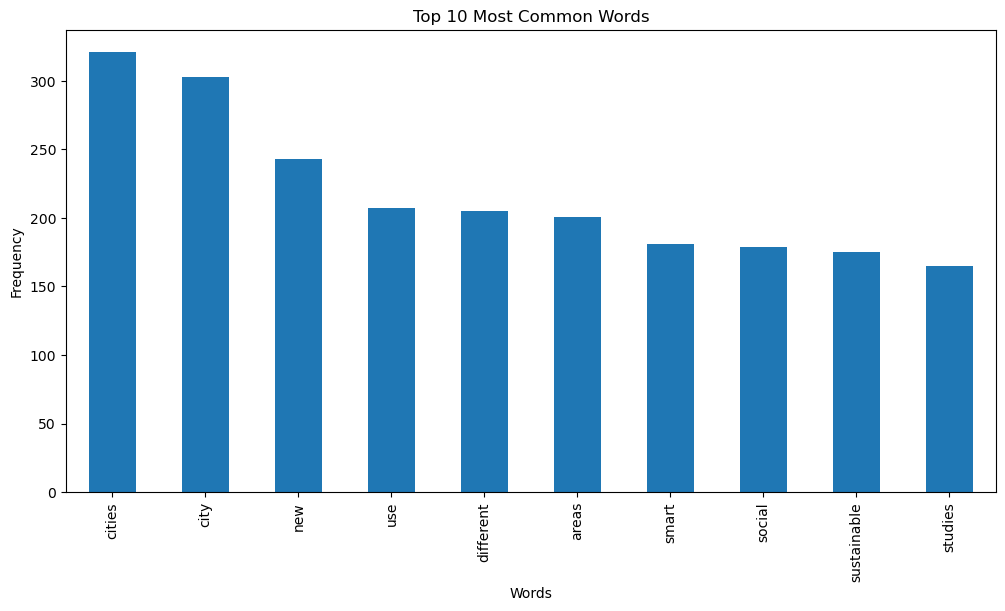

In [161]:
# Visualizar termos mais comuns

import matplotlib.pyplot as plt

# Sum up the counts of each word
sum_words = bow_df.sum(axis=0)

# Sort and select top 10 words
sorted_words = sum_words.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_words.plot(kind='bar')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [162]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from pprint import pprint

# Preparar análise LDA
# Criar dicionário
id2word = corpora.Dictionary(df_all["processedAbstract"])
print(id2word.token2id)

# Criar corpus
texts = df_all["processedAbstract"]

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualize the raw BoW representation
for doc in corpus:
    print(doc)

{'ability': 0, 'account': 1, 'actively': 2, 'activities': 3, 'administration': 4, 'ai': 5, 'air': 6, 'alternatives': 7, 'amounts': 8, 'analyse': 9, 'analyses': 10, 'applications': 11, 'applies': 12, 'artificial': 13, 'automated': 14, 'basis': 15, 'capture': 16, 'case': 17, 'categorise': 18, 'challenges': 19, 'cities': 20, 'conditions': 21, 'context': 22, 'damages': 23, 'decisionmaking': 24, 'decisions': 25, 'different': 26, 'efficient': 27, 'efficiently': 28, 'eg': 29, 'emphasize': 30, 'environmental': 31, 'etc': 32, 'expert': 33, 'future': 34, 'help': 35, 'highly': 36, 'improve': 37, 'influence': 38, 'intelligence': 39, 'intervene': 40, 'interviews': 41, 'inventory': 42, 'key': 43, 'large': 44, 'learn': 45, 'learning': 46, 'limitations': 47, 'literature': 48, 'living': 49, 'machine': 50, 'make': 51, 'mean': 52, 'models': 53, 'municipal': 54, 'participation': 55, 'patterns': 56, 'phases': 57, 'planners': 58, 'possibilities': 59, 'possible': 60, 'potential': 61, 'processes': 62, 'proces

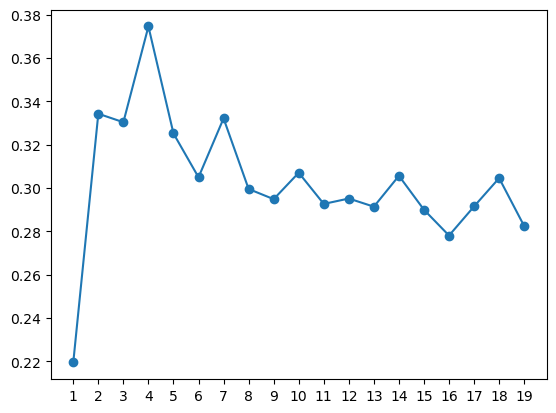

In [163]:
# Encontrar melhor número de tópicos para criar modelo LDA

n_i = []
coherence_score = []

for i in range(1, 20):
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=i, random_state=42, passes=10, alpha='auto', per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    n_i.append(i)
    coherence_score.append(coherence_lda)

plt.plot(n_i, coherence_score, marker="o")
plt.xticks(n_i)
plt.show()

Com base nesses resultados, podemos afirmar que o número de tópicos que deverá fornecer o modelo com melhor coerência é 4. 

In [165]:
# Treinar LDA
num_topics = 4
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=15, alpha='auto', per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.004*"areas" + 0.003*"factors" + 0.003*"cities" + 0.003*"area" + '
  '0.003*"city" + 0.002*"regression" + 0.002*"population" + 0.002*"social" + '
  '0.002*"different" + 0.002*"significant"'),
 (1,
  '0.005*"city" + 0.005*"cities" + 0.004*"new" + 0.004*"areas" + '
  '0.004*"different" + 0.003*"use" + 0.003*"studies" + 0.003*"area" + '
  '0.003*"method" + 0.003*"sustainable"'),
 (2,
  '0.004*"new" + 0.003*"cities" + 0.003*"city" + 0.003*"different" + '
  '0.003*"time" + 0.003*"smart" + 0.003*"management" + 0.003*"use" + '
  '0.002*"technologies" + 0.002*"systems"'),
 (3,
  '0.005*"smart" + 0.005*"cities" + 0.004*"challenges" + 0.004*"city" + '
  '0.004*"technologies" + 0.004*"new" + 0.003*"technology" + 0.003*"social" + '
  '0.003*"future" + 0.003*"management"')]


In [166]:
# Encontrar coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.37255504701467473


O valor da coerência - próximo de 0,37 - não é particularmente alto, o que significa que os clusters de tópicos não deverão ser assim tão diferentes entre si. Isto não é exatamente surpreendente, uma vez que a temática central do nosso trabalho é relativamente nichada e específica.

In [167]:
# Visualizar distribuição de tópicos gerada pelo modelo LDA
dictionary = Dictionary(texts)

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.026828  0.046219       1        1  55.929883
3     -0.097105  0.028184       2        1  23.145552
0      0.084649  0.004317       3        1  10.788337
2     -0.014372 -0.078720       4        1  10.136228, topic_info=              Term        Freq       Total Category  logprob  loglift
180          smart  160.000000  160.000000  Default  30.0000  30.0000
19      challenges   97.000000   97.000000  Default  29.0000  29.0000
186   technologies  113.000000  113.000000  Default  28.0000  28.0000
134        factors  100.000000  100.000000  Default  27.0000  27.0000
532     regression   51.000000   51.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
542        support    9.510146   84.359966   Topic4  -6.5058   0.1063
1023    technology    9.778094  100.802457   Topic4  -6.4780  -0.0440
61       potential    9.806935  111.280483   Topic4  -6.4751  -0.1399
159        network    9.572320  103.838784   Topic4  -6.4993  -0.0949
253        studies    9.082843  148.986476   Topic4  -6.5518  -0.5084

[371 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3748      4  0.922530       absorbed
688       1  0.668509  accessibility
688       2  0.066851  accessibility
688       3  0.200553  accessibility
688       4  0.066851  accessibility
...     ...       ...            ...
3261      2  0.314913        working
3261      3  0.044988        working
3261      4  0.314913        working
3970      2  0.916020         worlds
1846      1  0.973313         zoning

[740 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



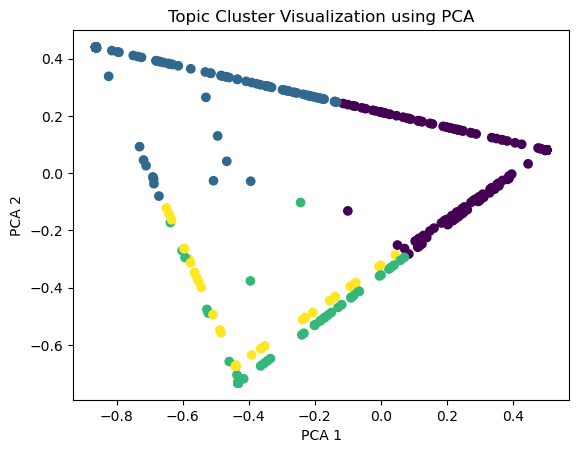

In [173]:
from sklearn.cluster import KMeans

# Clusterizar a distribuição de tópicos encontrada via LDA

# Get topic distribution for each document
doc_topic_dist = [lda_model.get_document_topics(bow) for bow in corpus]

# Initialize a matrix with zeros
doc_topic_matrix = np.zeros((len(doc_topic_dist), lda_model.num_topics))

# Populate the matrix
for i, doc in enumerate(doc_topic_dist):
    for topic, prob in doc:
        doc_topic_matrix[i, topic] = prob

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(doc_topic_matrix)

# Add cluster labels back to your original DataFrame
df_all['Topic_Cluster'] = clusters


# Visualizar a clusterização
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(doc_topic_matrix)

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Topic Cluster Visualization using PCA')
plt.show()

c:\Users\toto9\miniforge3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



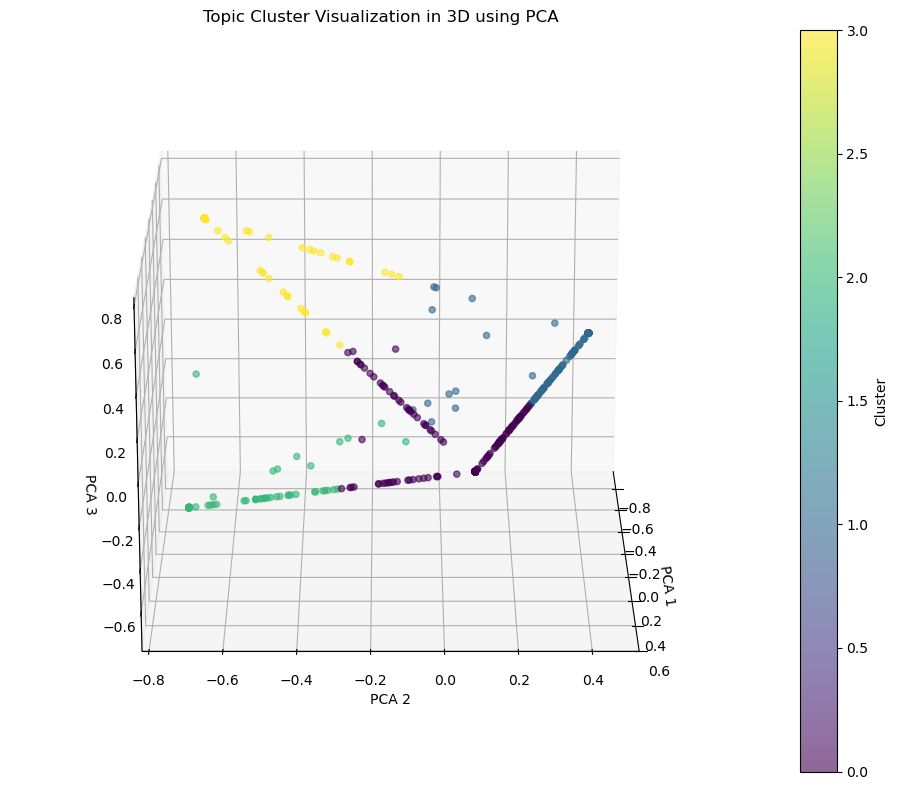

In [ ]:
# Gerar visualização em 3d para ver a distribuição dos 4 tópicos (e clusters)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Get topic distribution for each document
doc_topic_dist = [lda_model.get_document_topics(bow) for bow in corpus]

# Initialize a matrix with zeros
doc_topic_matrix = np.zeros((len(doc_topic_dist), lda_model.num_topics))

# Populate the matrix
for i, doc in enumerate(doc_topic_dist):
    for topic, prob in doc:
        doc_topic_matrix[i, topic] = prob

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(doc_topic_matrix)

# Add cluster labels back to your original DataFrame
df_all['Topic_Cluster'] = clusters

# Perform PCA for dimensionality reduction (now with 3 components)
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(doc_topic_matrix)

# Create 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(
    reduced_features[:, 0],
    reduced_features[:, 1],
    reduced_features[:, 2],
    c=clusters,
    cmap='viridis',
    alpha=0.6
)

# Add labels and title
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('Topic Cluster Visualization in 3D using PCA')

# Add colorbar
plt.colorbar(scatter, label='Cluster')

# Add grid
ax.grid(True)

# Adjust the viewing angle for better visualization
ax.view_init(elev=20, azim=0)

plt.tight_layout()
plt.show()

In [174]:
# Obter os termos mais relevantes de cada tópico do LDA
num_top_terms = 20
topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=num_top_terms, formatted=False)
topic_terms = {
    topic_id: [term for term, _ in terms] for topic_id, terms in topics
}

# Exibir clusters e termos associados
for i in range(4):  # Assumindo 4 clusters
    print(f"\nCluster {i}:")
    
    # Obter os tópicos mais representativos para o cluster
    cluster_docs = doc_topic_matrix[df_all['Topic_Cluster'] == i]
    avg_topic_dist = cluster_docs.mean(axis=0)  # Média de distribuições do cluster
    top_topics = avg_topic_dist.argsort()[::-1][:3]  # Top 3 tópicos para o cluster
    
    # Listar termos dos tópicos mais representativos
    print("Top terms from associated topics:")
    print(f', '.join(topic_terms[top_topics[0]]))
    print("\n")

    # Exibir os abstracts processados pertencentes ao cluster
    print("Processed abstracts:")
    print(df_all[df_all['Topic_Cluster'] == i]['abstract'].sample(5))


Cluster 0:
Top terms from associated topics:
city, cities, new, areas, different, use, studies, area, method, sustainable, land, public, provide, characteristics, space, proposed, patterns, important, show, social


Processed abstracts:
299    Urban planning has focused on reallocating roa...
521    The polycentric urban structure is regarded to...
168    With the integrated development of the Yangtze...
2      Window views significantly influence residenti...
588    Containing positioning information, mobile sig...
Name: abstract, dtype: object

Cluster 1:
Top terms from associated topics:
smart, cities, challenges, city, technologies, new, technology, social, future, management, sustainable, use, systems, digital, role, solutions, intelligence, approaches, science, applications


Processed abstracts:
609    This chapter describes the implementation of c...
283    The city of Newcastle, regional capital of Nor...
610    Smart cities are evolving and ever changing, i...
276    Citizen

##### **Categorias para os clusters LDA**

**Cluster 0:**
Categoria sugerida: "Urban Studies and Land Use Characteristics"
Termos como "land", "public", "space", "patterns", "area", "characteristics", e "social"
indicam um foco em estudos sobre o uso do solo, características das áreas urbanas e espaço público,
incluindo padrões de uso e métodos de análise.

**Cluster 1:**
Categoria sugerida: "Smart Cities and Technological Solutions"
Com termos como "smart", "technologies", "challenges", "digital", "sustainable", "intelligence", e "solutions",
este cluster claramente trata de cidades inteligentes, soluções tecnológicas e abordagens para enfrentar
desafios urbanos contemporâneos.

**Cluster 2:**
Categoria sugerida: "Urban Population and Spatial Analysis"
Termos como "areas", "population", "patterns", "density", "environment", e "models"
indicam um foco em estudos relacionados a populações urbanas, densidade, uso do solo e análise espacial,
utilizando modelos e fatores significativos que impactam cidades.

**Cluster 3:**
Categoria sugerida: "Technological Management and Mobility Systems"
Os termos "smart", "management", "technologies", "mobility", "systems", e "environment"
sugerem um foco na gestão de sistemas urbanos, tecnologias aplicadas e questões relacionadas à mobilidade
e meio ambiente em cidades.

### Quinta etapa - Modelagem e clusterização dos tópicos via Tf-idf

Dada a similaridade entre os artigos e proximidade natural entre os tópicos, uma vez que todos eles fazem parte de um nicho (aplicação de técnicas de Ciência de Dados e/ou Big Data a problemas de Planeamento Urbano) acreditamos que parecesse razoável considerar, ainda, a possibilidade de clusterizar os artigos e modelar os tópicos com base em uma distribuição Tf-idf, atribuindo menor importância a termos quase onipresentes - como *analysis*, *study*, etc.

In [175]:
# Criar Tfidf
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_all['abstract'].dropna())

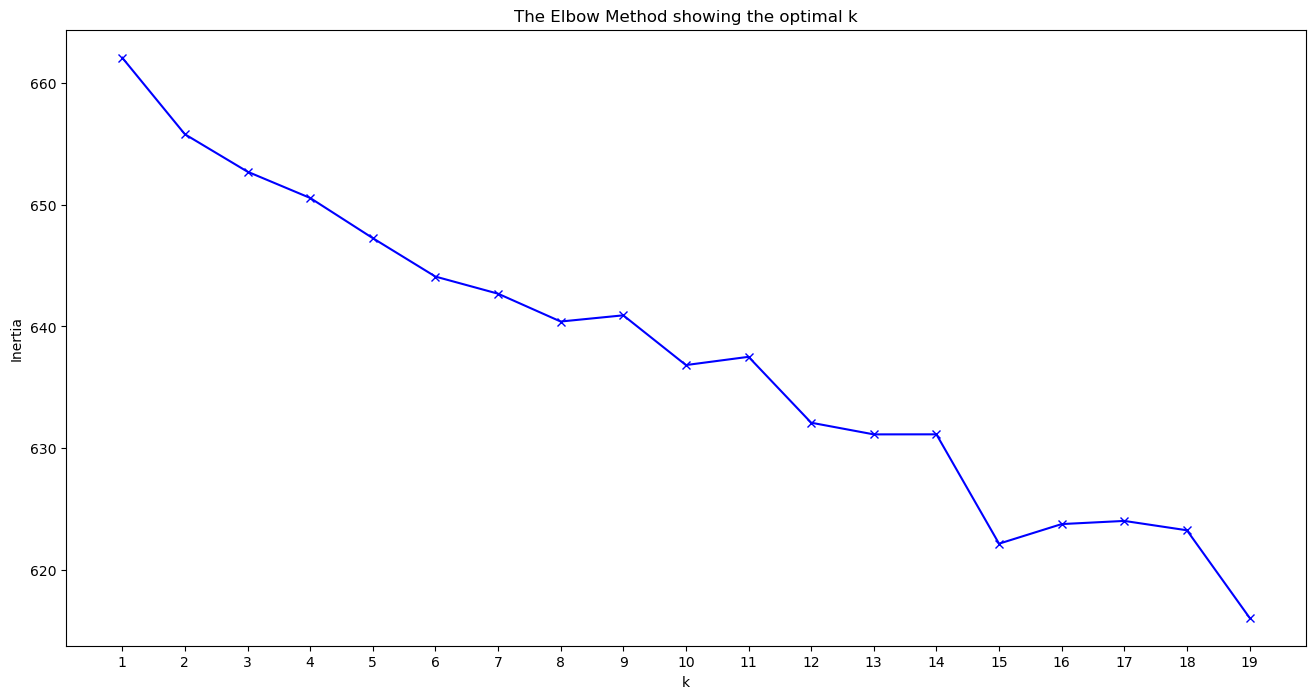

In [176]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Encontrar número ideal de clusters

# Elbow Method
inertia = []
K = range(1, 20)  # Assuming we want to check for up to 20 clusters

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 8))
plt.xticks(K)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [177]:
# Clusterizar via Tfidf

# Get topic distribution for each document
doc_topic_dist = [lda_model.get_document_topics(bow) for bow in corpus]

# Initialize a matrix with zeros
doc_topic_matrix = np.zeros((len(doc_topic_dist), lda_model.num_topics))

# Populate the matrix
for i, doc in enumerate(doc_topic_dist):
    for topic, prob in doc:
        doc_topic_matrix[i, topic] = prob

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add cluster labels back to your original DataFrame
df_all['Topic_Cluster_tfidf'] = clusters

# Obter termos mais relevantes para cada cluster
terms = tfidf_vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Exibir os abstracts por cluster e os principais termos TF-IDF
for i in range(4):
    print(f"\nCluster {i}:")
    print("Top TF-IDF terms:", [terms[ind] for ind in order_centroids[i, :20]])  # Top 20 termos
    print(df_all[df_all['Topic_Cluster_tfidf'] == i]['abstract'].sample(10))


Cluster 0:
Top TF-IDF terms: ['smart', 'urban', 'data', 'cities', 'city', 'sustainable', 'planning', 'development', 'digital', 'technologies', 'big', 'research', 'new', 'management', 'systems', 'technology', 'information', 'social', 'sustainability', 'challenges']
190    This book explores the rise of technology-cent...
252    Data-driven urbanism is often entangled with t...
609    This chapter describes the implementation of c...
485    This chapter focusses on the key role played b...
286    Urban planning is simultaneously shaped by and...
377    The contemporary ‘digital age’ prompts the nee...
66     Enterprise digital transformation stands as a ...
362    Future scenarios foresee a city as a fragmente...
516    As urbanization continues to accelerate, the n...
287    This chapter introduces the notion of Informed...
Name: abstract, dtype: object

Cluster 1:
Top TF-IDF terms: ['urban', 'spatial', 'data', 'land', 'development', 'areas', 'study', 'area', 'use', 'vibrancy', 'model'

##### **Categorias para os clusters tfidf, obtidas através de análise feita pelo Claude 3.5 Sonnet**

**Cluster 0: Inovação e Governança de Cidades Inteligentes**
**Categoria:** Desenvolvimento Urbano Inteligente e Transformação Digital
**Foco Principal:** Implementação de tecnologias digitais e soluções inteligentes para gestão urbana
Temas Principais:

* Infraestrutura digital e integração tecnológica
* Iniciativas de cidades inteligentes
* Desenvolvimento urbano sustentável
* Governança e planejamento urbano
* Gestão de sistemas de informação

**Justificativa:** A predominância de termos como "smart", "digital", "technologies", combinados com "management" e "sustainable" sugere um foco em soluções tecnológicas para desenvolvimento e governança urbana.
\
\
**Cluster 1: Planejamento Urbano e Análise Espacial**
**Categoria:** Desenvolvimento Espacial Urbano e Uso do Solo
**Foco Principal:** Planejamento urbano físico e funcional com ênfase em análise espacial
Temas Principais:

* Planejamento do uso do solo
* Desenvolvimento espacial
* Áreas urbanas funcionais
* Vitalidade urbana
* Modelagem analítica

**Justificativa:** Termos como "spatial", "land", "functional" e "vibrancy" indicam um foco nos aspectos físicos e analíticos do planejamento e desenvolvimento urbano.
\
\
**Cluster 2: Infraestrutura Verde Urbana e Espaços Públicos**
**Categoria:** Infraestrutura Verde Urbana e Design de Espaços Públicos
**Foco Principal:** Desenvolvimento e gestão de espaços verdes urbanos e infraestrutura
Temas Principais:

* Parques e áreas verdes
* Infraestrutura urbana
* Redes de ruas
* Densidade espacial
* Gestão de tráfego

**Justificativa:** A proeminência de termos como "park", "green", "street" e "spaces" sugere um foco na infraestrutura urbana física, particularmente em espaços verdes e áreas públicas.
\
\
**Cluster 3: Mobilidade Urbana e Comportamento Humano**
**Categoria:** Padrões de Mobilidade Urbana e Dinâmica Populacional
**Foco Principal:** Análise do movimento humano e comportamento em ambientes urbanos
Temas Principais:

* Mobilidade populacional
* Padrões de deslocamento
* Comportamento humano
* Análise de dados móveis
* Impacto da COVID-19 na mobilidade

**Justificativa:** Termos como "mobility", "travel", "patterns", "behavior" e "movement" claramente indicam um foco no estudo de como as pessoas se movem e interagem com os espaços urbanos.
\
\
**Temas Transversais**
Diversos temas aparecem em múltiplos clusters, indicando sua importância fundamental para os estudos urbanos:

* Análise de dados ("data" aparece em todos os clusters)
* Desenvolvimento urbano (comum em todos os clusters)
* Análise espacial (presente em múltiplos contextos)
* Considerações em escala urbana (cidade/cidades aparecem frequentemente)

### Sexta etapa - Encontrar as técnicas de Ciência de Dados utilizadas em cada artigo

Para responder a uma das questões que motivaram nosso trabalho - quais são as técnicas de Ciência de Dados de aplicações mais comuns a cada tipo de problema em Planeamento Urbano -, foi-nos necessário extrair, do abstract de cada artigo, as palavras e termos que diziam respeito às ferramentas e metodologias utilizadas. Isso poderia ser feito de algumas maneiras - com a criação (e afinação) de um modelo baseado em POS-tagging, por exemplo, ou com o treinamento de um modelo de reconhecimento de entidades nomeadas (NER). Ambas as técnicas são válidas e possíveis, mas passíveis de erros e demandariam treinamentos em corpus maiores de textos.

A forma que encontramos para solucionar o nosso problema foi, portanto, valermo-nos dos serviços da API da OpenAI - a criadora do ChatGPT -, que por alguns cêntimos de dólar permite-nos automatizar a análise e obtenção de informações através de algum modelo à nossa escolha. Neste caso, numa tentativa de equilibrar os custos e o poderio de cada modelo, aplicamos o GPT-3.5-turbo.

In [ ]:
from openai import OpenAI

# Configurar a chave da API OpenAI
OPENAI_API_KEY = #
client = OpenAI(
    api_key=OPENAI_API_KEY,  # This is the default and can be omitted
)

In [179]:
# Separar abstracts
abstracts = list(df_all["abstract"])
print(abstracts)

['In an urban context, the use of artificial intelligence (AI) can help to categorise and analyse large amounts of data quickly and efficiently. The AI approach can make municipal administration and planning processes more efficient, improve environmental and living conditions (e.g., air quality, inventory of road damages, etc.), or strengthen the participation of residents in decision-making processes. The key to this is “machine learning” that has the ability to recognise patterns, capture models, and learn on the basis of big data via the application of automated statistical methods. However, what does this mean for urban planning and the future development of cities? Will AI take over the planning and design of our cities and actively intervene in and influence planning activities? This article applies a systematic literature review supplemented by case study analyses and expert interviews to categorise various types of AI and relate their potential applications to the different ph

In [180]:
# Definir funções

import openai

def extract_techniques(content):
    """
    Extrai o campo 'content', remove caracteres indesejados e formata como lista de strings em minúsculas.
    
    :param content: O texto bruto do campo 'content' retornado pela API.
    :return: Lista de técnicas extraídas como strings em minúsculas.
    """
    # Remove '-' no início de linhas e separa por linha
    lines = content.replace("-", "").split("\n")
    
    # Remove espaços extras e converte para minúsculas
    techniques = [line.strip().lower() for line in lines if line.strip()]
    
    return techniques

def get_ds_techniques_from_abstract(api_key, abstracts):
    """
    Envia abstracts para a API da OpenAI e retorna as técnicas de ciência de dados identificadas.

    :param api_key: Sua chave de API da OpenAI.
    :param abstracts: Lista de abstracts (strings) para serem analisados.
    :return: Um dicionário onde as chaves são os abstracts e os valores são listas de técnicas identificadas.
    """
    openai.api_key = api_key

    results = {}

    for abstract in abstracts:
        try:
            # Prompt que será enviado para a API
            prompt = (
                "Você é um assistente especializado em ciência de dados. Abaixo está o resumo de um artigo científico. "
                "Identifique e liste as técnicas relacionadas a ciências de dados mencionadas no texto. Devolva os resultados em inglês."
                "As técnicas devem ser agrupadas em grupos semelhantes. Big Data Analysis, Big Data Analytics, Big Data devem todos ser agrupados em Big Data, por exemplo."
                "Você não deve alocar as técnicas de cada abstract a mais de 20 técnicas diferentes. Queremos algo mais geral e menos específico."
                "Se não houver técnicas de ciência de dados, retorne uma lista vazia.\n\n"
                f"Resumo: {abstract}\n\nTécnicas de ciência de dados:"
            )

            # Solicita à API que analise o abstract usando o formato ChatCompletion
            response = client.chat.completions.create(
                model="gpt-3.5-turbo",  # Ou "gpt-4", se necessário
                messages=[
                    {"role": "system", "content": "Você é um assistente especializado em ciência de dados, fluente apenas em inglês."},
                    {"role": "user", "content": prompt},
                ],
                max_tokens=200,
                temperature=0.3
            )

            # Extrair o conteúdo da mensagem
            content = response.choices[0].message.content

            # Converte o conteúdo em uma lista de técnicas
            techniques_list = extract_techniques(content)

            # Salva o resultado no dicionário
            results[abstract] = techniques_list

        except Exception as e:
            print(f"Erro ao processar o abstract: {abstract[:50]}...\nErro: {e}")
            results[abstract] = []  # Em caso de erro, retorna uma lista vazia

    return results

In [181]:
# Obter técnicas dos abstracts via solicitação para OpenAI
lista_tecnicas = get_ds_techniques_from_abstract(OPENAI_API_KEY, abstracts)

In [199]:
# Formatar a resposta da OpenAI
def format_list_as_string(input_list):
    """
    Transforma uma lista de strings no formato desejado, com cada elemento entre aspas e separado por vírgulas.

    :param input_list: Lista de strings.
    :return: Uma lista de strings.
    """
    # Retorna a lista com aspas em torno de cada item
    formatted_list = [f'{item}' for item in input_list]
    return formatted_list

tecnicas = []

for key, value in lista_tecnicas.items():
    tecnicas.append(value)

# Agora a coluna "tecnicas" conterá listas de strings
df_all["tecnicas"] = [format_list_as_string(tecnica) for tecnica in tecnicas]
df_all.head()

# Salvar Dataframe
df_all.to_csv(r"C:\Users\toto9\OneDrive\Área de Trabalho\ICD\Trabalho ICD\df_processado_clusterizado_com_tecnicas.csv")

In [ ]:
# Consertar formatação da coluna com listas

import ast
tecnicas = df_all["tecnicas"]

# Criar coluna com técnicas em formato str
df_all["tecnicas_str"] = df_all["tecnicas"].str.join(", ")

# Continuar a consertar a formatação
lista_tecnicas = []

for i in df_all["tecnicas_str"]:
    lista_tecnicas.append(i.split(", "))

lista_sem_aspas = []

for i in lista_tecnicas:
    for j in i:
        lista_sem_aspas.append(j.strip('"'))

df_all["tecnicas"] = df_all["tecnicas_str"].str.split(", ")

In [209]:
# Visualizar técnicas
pd.set_option('display.max_rows', 500)

lista_sem_aspas = pd.DataFrame(lista_sem_aspas)
lista_sem_aspas.value_counts().head(200)

0                                             
big data analysis                                 452
data visualization                                367
data mining                                       328
machine learning                                  305
spatial analysis                                  257
data integration                                  160
data analysis                                     147
predictive modeling                               138
pattern recognition                               137
data interpretation                               123
time series analysis                              119
data processing                                    97
text mining                                        96
big data analytics                                 95
feature engineering                                94
network analysis                                   94
statistical analysis                               93
predictive analytics               

Selecionamos as 200 primeiras técnicas e consolidamo-las em 10 diferentes categorias, de modo a permitir análises agregadas das técnicas e termos (como, por exemplo, ao incluir "Big Data Analysis" e "Big Data Analytics" na mesma categoria)

In [210]:
# Incluir diferentes strings em um dicionário

category_mapping = {
    "Análise de Dados": [
        "data visualization", "data analysis", "data interpretation", "data exploration",
        "statistical analysis", "quantitative analysis", "correlation analysis",
        "descriptive statistics", "data presentation", "trend analysis", "descriptive analytics"
    ],
    "Modelagem Preditiva e Machine Learning": [
        "machine learning", "deep learning", "artificial intelligence", "predictive modeling",
        "predictive analytics", "classification", "clustering", "clustering analysis",
        "supervised learning", "unsupervised learning", "decision trees", "random forest",
        "support vector machines", "ensemble learning", "regression analysis",
        "feature engineering", "dimensionality reduction", "model evaluation", "modeling",
        "model validation", "classification algorithms", "neural networks"
    ],
    "Mineração e Processamento de Dados": [
        "data mining", "text mining", "pattern recognition", "data preprocessing",
        "data cleaning", "feature selection", "data transformation", "dimensionality reduction",
        "pattern detection", "trajectory analysis", "spatial data mining"
    ],
    "Gestão e Integração de Dados": [
        "data integration", "data collection", "data management", "data storage",
        "data aggregation", "data governance", "data sharing", "data quality assessment",
        "data validation", "data manipulation", "data replication", "big data integration"
    ],
    "Big Data e Computação em Nuvem": [
        "big data", "big data analysis", "big data analytics", "big data processing",
        "cloud computing"
    ],
    "Geociências e Dados Espaciais": [
        "spatial analysis", "geographic information systems (gis)", "spatial data analysis",
        "geospatial analysis", "spatiotemporal analysis", "spatiotemporal data mining",
        "spatial statistics", "spatial autocorrelation analysis", "spatial heterogeneity analysis",
        "spatial regression", "gis spatial analysis", "geographically weighted regression",
        "remote sensing", "urban planning analysis", "urban development analysis",
        "urban analytics", "urban mobility analysis", "spatial planning", "spatial pattern analysis"
    ],
    "Análise Social e Urbana": [
        "social network analysis", "socioeconomic analysis", "social media analysis",
        "social media analytics", "urban data analysis", "urban analytics",
        "urban planning optimization", "urban data management", "urban data science",
        "smart cities development", "datadriven urban planning", "datadriven policy making",
        "environmental data analysis", "demographic analysis"
    ],
    "Análise Temporal": [
        "time series analysis", "temporal analysis", "trend analysis", "realtime data analysis"
    ],
    "Inteligência Artificial e NLP": [
        "artificial intelligence (ai)", "natural language processing (nlp)", "text mining",
        "sentiment analysis", "image processing", "image analysis", "image recognition",
        "topic modeling"
    ],
    "Estratégias e Decisões Orientadas a Dados": [
        "datadriven decision making", "datadriven insights", "datadriven planning",
        "datadriven solutions", "datadriven approaches", "datadriven strategies",
        "datadriven technologies"
    ],
    "Outras Técnicas Avançadas": [
        "decision support systems", "simulation", "quantitative analysis", "algorithm development",
        "structural equation modeling", "factor analysis", "association analysis"
    ]
}

In [211]:
# Função para mapear categorias de cada técnica
def map_categories_for_list(techniques_list):
    categories = []
    for technique in techniques_list:
        # Normalizar a técnica (remover espaços e colocar tudo em minúsculas)
        normalized_technique = technique.strip('"').lower()

        # Depuração: Mostrar o que está sendo processado
        print(f"Processando técnica: {normalized_technique}")

        # Percorre o dicionário de categorias
        for category, techniques in category_mapping.items():
            # Normalizar as técnicas no dicionário para comparação
            normalized_techniques = [t.lower() for t in techniques]
            if normalized_technique in normalized_techniques:
                print(f"Correspondência encontrada: {normalized_technique} -> {category}")
                categories.append(category)
                break
        else:
            # Adiciona "Outras" se a técnica não foi categorizada
            print(f"Nenhuma correspondência encontrada para: {normalized_technique}")
            categories.append("Outras")
    return categories

# Aplicar a função no DataFrame
df_all["tecnicas_str_categorizadas"] = df_all["tecnicas"].apply(map_categories_for_list)

Processando técnica: artificial intelligence (ai)
Correspondência encontrada: artificial intelligence (ai) -> Inteligência Artificial e NLP
Processando técnica: machine learning
Correspondência encontrada: machine learning -> Modelagem Preditiva e Machine Learning
Processando técnica: big data analysis
Correspondência encontrada: big data analysis -> Big Data e Computação em Nuvem
Processando técnica: automated statistical methods
Nenhuma correspondência encontrada para: automated statistical methods
Processando técnica: systematic literature review
Nenhuma correspondência encontrada para: systematic literature review
Processando técnica: big data analysis
Correspondência encontrada: big data analysis -> Big Data e Computação em Nuvem
Processando técnica: big data analytics
Correspondência encontrada: big data analytics -> Big Data e Computação em Nuvem
Processando técnica: artificial neural network (ann)
Nenhuma correspondência encontrada para: artificial neural network (ann)
Processa

In [212]:
# Explodir a coluna 'tecnicas_str_categorizadas'
df_exploded = df_all.explode("tecnicas_str_categorizadas")

# Contar as técnicas por Topic_Cluster (LDA)
common_techniques_by_cluster = round(df_exploded.groupby("Topic_Cluster")["tecnicas_str_categorizadas"].value_counts(normalize=True)*100, 2)

# Exibir as técnicas mais comuns por Topic_Cluster (LDA)
print("Técnicas mais comuns por Topic_Cluster:")
print(common_techniques_by_cluster)

Técnicas mais comuns por Topic_Cluster:
Topic_Cluster  tecnicas_str_categorizadas               
0              Outras                                       50.23
               Modelagem Preditiva e Machine Learning       10.94
               Análise de Dados                              9.88
               Geociências e Dados Espaciais                 7.04
               Mineração e Processamento de Dados            6.80
               Big Data e Computação em Nuvem                6.08
               Gestão e Integração de Dados                  3.57
               Análise Temporal                              1.75
               Estratégias e Decisões Orientadas a Dados     1.25
               Análise Social e Urbana                       1.03
               Inteligência Artificial e NLP                 0.99
               Outras Técnicas Avançadas                     0.43
1              Outras                                       53.44
               Modelagem Preditiva e Machine 

A análise às categorias de técnicas mais comuns a cada cluster permite-nos inferir algumas conclusões.

Em primeiro lugar, é notável que aproximadamente metade das técnicas utilizadas não esteja categorizada dentro de alguma das categorias construídas com as 200 técnicas mais frequentes. Isto indica que - por mais que estejam enraizadas em "grandes categorias" como Machine Learning ou Análise de Dados - a maior parte das técnicas e processos de Ciência de Dados no contexto dos problemas de Planeamento Urbano é específica e adaptada a algumas situações e problemas em particular.

Em segundo lugar, pode-se observar a significativa importância das técnicas de Modelagem Preditiva e Machine Learning e de Análise de Dados, muito frequentes em todos os clusters.

Pelo lado das diferenças, é notável observar que os Clusters 0 (Urban Studies and Land Use Characteristics) e 2 (Urban Population and Spatial Analysis) apresentam grande presença de técnicas de Geociências e Dados Espaciais, o que - apesar de natural para os tipos de problemas e temas abordados - parece-nos uma interessante evolução decorrente dos desenvolvimentos em técnicas de obtenção e processamento de dados no ambiente urbano.

Por fim, é também interessante notar a importância da utilização de técnicas de Big Data para quase todos os Clusters, sendo o Cluster 2 (com maior associação a temáticas de Análise Espacial e População Urbana) a única exceção. Isso ocorre também porque boa parte desses estudos diz respeito a questões como densidade e uso do solo, para os quais técnicas de Big Data podem ser menos relevantes que, por exemplo, estudos voltados a Mobilidade Urbana.

In [214]:
# Visualizar as técnicas sem agrupá-las
clusters_lda = df_all["Topic_Cluster"].unique()

# Explodir a coluna 'tecnicas'
df_exploded = df_all.explode("tecnicas")

# Iterar sobre os clusters
for cluster in clusters_lda:
    # Agrupar as técnicas por cluster e contar a frequência
    common_techniques_by_cluster = df_exploded[df_exploded["Topic_Cluster"] == cluster].groupby("tecnicas")["tecnicas"].count()
    
    # Exibir o top 20 mais comuns para o cluster atual
    top_20_techniques = common_techniques_by_cluster.nlargest(20)
    
    # Exibir o resultado
    print(f"Top 20 técnicas mais comuns no Cluster {cluster}:")
    print(top_20_techniques)
    print("=" * 50)

Top 20 técnicas mais comuns no Cluster 0:
tecnicas
big data analysis             264
data visualization            210
data mining                   189
machine learning              171
spatial analysis              167
predictive modeling            88
data integration               85
pattern recognition            83
data interpretation            81
data analysis                  71
statistical analysis           61
time series analysis           60
data processing                56
data modeling                  55
feature engineering            52
network analysis               47
datadriven decision making     44
data collection                43
clustering analysis            42
text mining                    40
Name: tecnicas, dtype: int64
Top 20 técnicas mais comuns no Cluster 1:
tecnicas
big data analysis              100
data visualization              71
data mining                     68
machine learning                64
big data analytics              45
data integrati

Podemos notar que boa parte das técnicas está presente em todos os clusters. Portanto, devemos tentar também visualizar a distribuição de técnicas para cada cluster levando em consideração métricas como o Tf-idf, possibilitando-nos identificar aquelas que são mais específicas a cada um deles.

In [219]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

def analisar_tecnicas_tfidf(df, coluna_cluster='Topic_Cluster', coluna_tecnicas='tecnicas', n_top=20):
    """
    Realiza análise TF-IDF das técnicas por cluster, excluindo termos específicos.
    """
    # Termos a serem excluídos
    termos_excluir = [
        'analysis', 'data', 'data analysis', 'spatial', 
        'analysis data', 'big', 'big data'
    ]
    
    # Criar um dicionário para armazenar os documentos por cluster
    documentos_por_cluster = defaultdict(list)
    
    # Preparar os documentos: juntar todas as técnicas de cada documento em um texto
    for cluster in df[coluna_cluster].unique():
        docs_cluster = df[df[coluna_cluster] == cluster][coluna_tecnicas]
        for doc in docs_cluster:
            if isinstance(doc, list):
                # Filtrar os termos excluídos antes de juntar
                doc_filtrado = [termo for termo in doc if termo.lower() not in termos_excluir]
                documentos_por_cluster[cluster].append(' '.join(doc_filtrado))
            else:
                documentos_por_cluster[cluster].append('')
    
    # Criar um único documento por cluster juntando todas as técnicas
    documentos_unidos = {
        cluster: ' '.join(docs) 
        for cluster, docs in documentos_por_cluster.items()
    }
    
    # Aplicar TF-IDF com stopwords personalizadas
    vectorizer = TfidfVectorizer(
        ngram_range=(1, 2),
        stop_words=list(set(['english'] + termos_excluir)),  # Combina stopwords padrão com nossa lista
        max_features=1000
    )
    
    # Criar matriz TF-IDF
    tfidf_matrix = vectorizer.fit_transform(documentos_unidos.values())
    
    # Obter os termos
    feature_names = vectorizer.get_feature_names_out()
    
    # Para cada cluster, obter os termos mais relevantes
    resultados = {}
    for i, (cluster, _) in enumerate(documentos_unidos.items()):
        # Obter scores TF-IDF para este cluster
        tfidf_scores = tfidf_matrix[i].toarray()[0]
        
        # Criar um DataFrame com termos e scores
        cluster_scores = pd.DataFrame({
            'termo': feature_names,
            'score': tfidf_scores
        })
        
        # Ordenar por relevância e pegar os top n
        top_termos = cluster_scores.nlargest(n_top, 'score')
        resultados[cluster] = top_termos
    
    # Exibir resultados
    print("\n=== Análise TF-IDF: Técnicas Mais Relevantes por Cluster ===\n")
    
    for cluster, termos in resultados.items():
        print(f"\nCluster {cluster}:")
        print("-" * 50)
        print("Termo                                  Score TF-IDF")
        print("-" * 50)
        for _, row in termos.iterrows():
            print(f"{row['termo']:<35} {row['score']:.4f}")
        print("=" * 50)
        
    return resultados

# Aplicar a análise
resultados_tfidf = analisar_tecnicas_tfidf(df_all)


=== Análise TF-IDF: Técnicas Mais Relevantes por Cluster ===


Cluster 0:
--------------------------------------------------
Termo                                  Score TF-IDF
--------------------------------------------------
mining                              0.2957
modeling                            0.2761
learning                            0.2737
visualization                       0.2700
urban                               0.2639
machine                             0.2334
machine learning                    0.2285
predictive                          0.1503
integration                         0.1466
pattern                             0.1430
analytics                           0.1356
planning                            0.1320
datadriven                          0.1307
network                             0.1222
processing                          0.1173
recognition                         0.1136
clustering                          0.1124
model                               0.11

O Cluster 0, relacionado à análise e planejamento urbano, apresenta a mineração e modelagem de dados e a utilização de técnicas de Machine Learning como algumas de suas principais técnicas. Isto parece indicar que tais técnicas de obtenção, tratamento e análise de dados possam ser adequadas a problemas desta natureza. No caso das técnicas de Machine Learning e Predictive Modeling, isto parece-nos indicar que é adequada a utilização desses dados e informações para o planeamento futuro.

Para o Cluster 1 (Smart Cities and Technological Solutions), podemos observar a importância de técnicas de Analytics e Data Mining. A presença de termos como "smart", "technology" e "management" indica ainda a importância das tecnologias associadas ao conceito de *smart cities*, tanto para a obtenção e o tratamento de dados quanto para a aplicação de novas soluções. Como termos exclusivos podemos destacar "text mining" e "information technology", o que parece indicar que o processamento de dados não-estruturados, na forma de textos, pode ser uma importante forma de obtenção de informações em problemas desta natureza.

Para o Cluster 2 ("Urban Population and Spatial Analysis"), observa-se uma forte presença dos termos "datadriven", "regression" e "interpretation", tipicamente ligados à área das Ciências Econômicas - que há muito dedica-se a problemas desta natureza. Isto também é perceptível na presença dos termos "integration", "interpretation" e "predictive modeling", o que parece indicar uma ligação destes artigos à construção e aplicação de políticas públicas.

Por fim, o último cluster ("Technological Management and Mobility Systems") apresenta grande presença dos termos "analytics", "mining" e "visualization" associados a "systems", "technologies" e "time series". Isso parece indicar um foco em problemas e soluções relacionados a sistemas tecnológicos e análises temporais, o que parece fazer bastante sentido para o campo da mobilidade urbana. O diferencial de foco em "series" e "time" parece reforçar a importância da análise temporal e histórica.

In [220]:
# Fazer o mesmo, agora para a clusterização por Tf-idf

# Explodir a coluna 'tecnicas'
df_exploded = df_all.explode("tecnicas_str_categorizadas")

# Contar as técnicas por Topic_Cluster
common_techniques_by_cluster = round(df_exploded.groupby("Topic_Cluster_tfidf")["tecnicas_str_categorizadas"].value_counts(normalize=True)*100, 2)

# Exibir as técnicas mais comuns por Topic_Cluster
print("Técnicas mais comuns por Topic_Cluster_tfidf:")
print(common_techniques_by_cluster)

Técnicas mais comuns por Topic_Cluster_tfidf:
Topic_Cluster_tfidf  tecnicas_str_categorizadas               
0                    Outras                                       54.12
                     Modelagem Preditiva e Machine Learning        9.61
                     Big Data e Computação em Nuvem                8.58
                     Análise de Dados                              6.83
                     Mineração e Processamento de Dados            6.26
                     Gestão e Integração de Dados                  4.20
                     Geociências e Dados Espaciais                 3.16
                     Inteligência Artificial e NLP                 2.00
                     Análise Social e Urbana                       1.88
                     Análise Temporal                              1.57
                     Estratégias e Decisões Orientadas a Dados     1.32
                     Outras Técnicas Avançadas                     0.47
1                    Outras

A seguir apresentaremos a análise às categorias de técnicas mais comuns a cada cluster obtido via Tf-idf.

Como na clusterização via LDA, podemos também observar aqui a forte presença de técnicas enquadradas na categoria "Outras". Isto ocorre pelos mesmos motivos apresentados anteriormente.

Podemos observar, para o Cluster 0 ("Inovação e Governança de Cidades Inteligentes"), a forte presença de técnicas de Modelagem Preditiva e Machine Learning, Big Data e Computação em Nuvem e Mineração e Processamento de Dados. Isto parece natural para uma categoria voltada a temas práticos, voltados à Administração Pública e a políticas públicas. Para o Cluster 1 ("Planejamento Urbano e Análise Espacial"), podemos observar ainda a forte presença de técnicas de Geociências e Dados Espaciais, naturais - e inevitáveis - quando passamos a considerar também o fator espacial.

Para o Cluster 2 ("Infraestrutura Verde Urbana e Espaços Públicos"), vemos uma forte associação entre Análise de Dados, Modelagem Preditiva e Machine Learning e Geociências e Dados Espaciais, o que novamente parece indicar a importância de uma análise multifatorial - considerando tanto os aspectos "numéricos" e "quantitativos" quanto os fatores espaciais na tomada de decisão em infraestrutura urbana. Por fim, para o Cluster 3 ("Mobilidade Urbana e Comportamento Humano") voltamos a notar a importância de técnicas de Análise de Dados, Modelagem Preditiva e Machine Learning e Mineração e Processamento de Dados. Isto parece indicar o potencial que a geração (e consequente processamento) de dados relativos a sistemas de transportes tem na solução de desafios de mobilidade urbana.

In [216]:
# Visualizar técnicas sem agrupá-las, para a clusterização por Tf-idf
clusters_tfidf = df_all["Topic_Cluster_tfidf"].unique()

# Explodir a coluna 'tecnicas'
df_exploded = df_all.explode("tecnicas")

# Iterar sobre os clusters
for cluster in clusters_tfidf:
    # Agrupar as técnicas por cluster e contar a frequência
    common_techniques_by_cluster = df_exploded[df_exploded["Topic_Cluster_tfidf"] == cluster].groupby("tecnicas")["tecnicas"].count()
    
    # Exibir o top 20 mais comuns para o cluster atual
    top_20_techniques = common_techniques_by_cluster.nlargest(20)
    
    # Exibir o resultado
    print(f"Top 20 técnicas mais comuns no Cluster {cluster}:")
    print(top_20_techniques)
    print("=" * 50)

Top 20 técnicas mais comuns no Cluster 0:
tecnicas
big data analysis              165
data visualization             106
data mining                     99
machine learning                99
big data analytics              68
data integration                57
data analysis                   53
predictive analytics            49
spatial analysis                48
text mining                     47
time series analysis            39
sentiment analysis              32
natural language processing     31
data processing                 30
big data                        28
network analysis                28
data collection                 26
pattern recognition             26
data interpretation             25
datadriven decision making      24
Name: tecnicas, dtype: int64
Top 20 técnicas mais comuns no Cluster 1:
tecnicas
big data analysis                       175
data visualization                      143
data mining                             136
spatial analysis                     

In [221]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

def analisar_tecnicas_tfidf(df, coluna_cluster='Topic_Cluster_tfidf', coluna_tecnicas='tecnicas', n_top=20):
    """
    Realiza análise TF-IDF das técnicas por cluster, excluindo termos específicos.
    """
    # Termos a serem excluídos
    termos_excluir = [
        'analysis', 'data', 'data analysis', 'spatial', 
        'analysis data', 'big', 'big data'
    ]
    
    # Criar um dicionário para armazenar os documentos por cluster
    documentos_por_cluster = defaultdict(list)
    
    # Preparar os documentos: juntar todas as técnicas de cada documento em um texto
    for cluster in df[coluna_cluster].unique():
        docs_cluster = df[df[coluna_cluster] == cluster][coluna_tecnicas]
        for doc in docs_cluster:
            if isinstance(doc, list):
                # Filtrar os termos excluídos antes de juntar
                doc_filtrado = [termo for termo in doc if termo.lower() not in termos_excluir]
                documentos_por_cluster[cluster].append(' '.join(doc_filtrado))
            else:
                documentos_por_cluster[cluster].append('')
    
    # Criar um único documento por cluster juntando todas as técnicas
    documentos_unidos = {
        cluster: ' '.join(docs) 
        for cluster, docs in documentos_por_cluster.items()
    }
    
    # Aplicar TF-IDF com stopwords personalizadas
    vectorizer = TfidfVectorizer(
        ngram_range=(1, 2),
        stop_words=list(set(['english'] + termos_excluir)),  # Combina stopwords padrão com nossa lista
        max_features=1000
    )
    
    # Criar matriz TF-IDF
    tfidf_matrix = vectorizer.fit_transform(documentos_unidos.values())
    
    # Obter os termos
    feature_names = vectorizer.get_feature_names_out()
    
    # Para cada cluster, obter os termos mais relevantes
    resultados = {}
    for i, (cluster, _) in enumerate(documentos_unidos.items()):
        # Obter scores TF-IDF para este cluster
        tfidf_scores = tfidf_matrix[i].toarray()[0]
        
        # Criar um DataFrame com termos e scores
        cluster_scores = pd.DataFrame({
            'termo': feature_names,
            'score': tfidf_scores
        })
        
        # Ordenar por relevância e pegar os top n
        top_termos = cluster_scores.nlargest(n_top, 'score')
        resultados[cluster] = top_termos
    
    # Exibir resultados
    print("\n=== Análise TF-IDF: Técnicas Mais Relevantes por Cluster ===\n")
    
    for cluster, termos in resultados.items():
        print(f"\nCluster {cluster}:")
        print("-" * 50)
        print("Termo                                  Score TF-IDF")
        print("-" * 50)
        for _, row in termos.iterrows():
            print(f"{row['termo']:<35} {row['score']:.4f}")
        print("=" * 50)
        
    return resultados

# Aplicar a análise
resultados_tfidf = analisar_tecnicas_tfidf(df_all)


=== Análise TF-IDF: Técnicas Mais Relevantes por Cluster ===


Cluster 0:
--------------------------------------------------
Termo                                  Score TF-IDF
--------------------------------------------------
analytics                           0.3359
urban                               0.2950
mining                              0.2737
learning                            0.2150
datadriven                          0.2044
visualization                       0.2008
machine                             0.1902
machine learning                    0.1866
planning                            0.1546
integration                         0.1404
modeling                            0.1351
processing                          0.1351
smart                               0.1191
predictive                          0.1173
systems                             0.1155
management                          0.1120
development                         0.0977
information                         0.09

O Cluster 0 ("Inovação e Governança de Cidades Inteligentes") tem forte presença de "analytics", "urban" e "mining", o que parece ressonar com os temas centrais ao tópico. Com "development" e "information" como diferenciais, a análise às técnicas sugere a possibilidade de aplicações práticas de tecnologias de informação ao desenvolvimento urbano. O Cluster 1 ("Planejamento Urbano e Análise Espacial"), por sua vez, apresenta "learning", "visualization" e "machine learning" como técnicas principais. Em associação a "pattern", "regression" e "recognition", isso parece indicar que os problemas dentro deste tópico têm sido abordados numa perspectiva de análise de padrões espaciais. Os termos "feature" e "pattern recognition", específicos a este cluster, reforçam essa percepção.

O Cluster 2 ("Infraestrutura Verde Urbana e Espaços Públicos") e seus termos "modeling", "visualization", "clustering" e "decision" parece apresentar grande relação entre os problemas de planeamento de infraestruturas e espaços públicos e a modelagem, visualização e clusterização de dados para a tomada de decisão. Os termos "time" e "development" parecem indicar, ainda, a preocupação com a utilização dessas informações para o desenvolvimento dessas infraestruturas.

Por fim, o Cluster 3 ("Mobilidade Urbana e Comportamento Humano") e os termos "modeling", "visualization", "mining", "pattern", "recognition" e "series" demonstra a importância central da utilização de dados na análise e tomada de decisão relativas aos temas de transporte e mobilidade. O foco em termos como "statistical", "time" e "series" indica a importância central dos paineis de dados nesses problemas.

### Conclusões

A análise dos *abstracts* obtidos e processados para os artigos permitiu-nos chegar a algumas conclusões.

Dentro de um tema nichado e mais específico como é o caso das aplicações de técnicas de Ciência de Dados e Big Data a problemas de Planeamento Urbano e Espacial, a divisão dos artigos e problemas em *clusters* nem sempre é intuitiva ou apresenta forte coerência. Com artigos com temáticas relativamente similares e/ou próximas, a aplicação a diferentes contextos nem sempre é necessariamente suficiente para permitir a divisão destes em grandes grupos. Apesar disso, acreditamos que as duas formas adotadas para a clusterização dos artigos (via LDA e, alternativamente, via Tf-idf) foram suficientemente satisfatórias para permitir-nos agrupar e visualizar a distribuição dos artigos, além de facilitar a busca por padrões em cada um dos grupos.

Uma interessante particularidade diz respeito às diferenças entre a clusterização realizada via LDA e a clusterização realizada via Tf-idf. Enquanto os clusters gerados pela primeira pareceram-nos um pouco mais heterogêneos, dizendo respeito a problema de naturezas sensivelmente distintas ("Land Use", "Smart Cities", "Urban Population", "Mobility Systems"), a divisão de temas gerada via matriz Tf-idf pareceu muito mais específica ("Inovação e Governança de Cidades", "Planejamento Urbano", "Infraestrutura Verde Urbana e Espaços Públicos" e "Mobilidade Urbana"), com alguns dos temas possivelmente contidos ou tangentes a outros.

O mesmo desafio está presente na análise das técnicas aplicadas a cada problema. Embora os *abstracts* nos possam fornecer informações significativas, é natural que muitas das técnicas ali mencionadas - e reconhecidas por modelos de NER - sejam extremamente específicas aos problemas e temas ali em causa. Agrupar as técnicas por grandes categorias (como "Machine Learning", por exemplo) permite-nos analisar essa distribuição com alguma profundidade, mas faz-nos perder demasiada informação. Buscar analisar a utilização de técnicas individualmente, por outro lado, pode não fazer justiça a técnicas que possuam as mesmas bases teóricas, mas que na prática estejam aplicadas de formas diferentes a diferentes problemas. A aplicação da análise via Tf-idf pareceu possibilitar-nos a melhor identificação dos termos e técnicas mais específicos a cada cluster de problemas.

A nossa análise permitiu-nos identificar, para cada um dos clusters, os termos e técnicas de Ciência de Dados mais fortemente associados, específicos e representativos. Pela análise destes, podemos intuir que tipo de abordagem tem sido feita nos estudos e análises do campo do conhecimento até aos dias de hoje, comparar a evolução histórica da importância de determinadas técnicas e, ao mesmo tempo, guiarmo-nos na exploração de ferramentas já existentes e testadas a problemas de Planeamento Urbano que nos interessem e refletir sobre novas abordagens que talvez ainda estejam restritas a problemas de naturezas diferentes.